## Импортируем библиолтеки.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import unicodedata
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Загрузим и просмотрим данные.

In [2]:
moscow = pd.read_csv('D:\Data Scientist_Skill Factory\Folders with data/Hackathon_1/Moscow.csv',  encoding="utf-8")
moscow.columns = moscow.iloc[2]# Вынесем третью строку в заголовок
moscow = moscow.drop(labels = [0,1,2],axis = 0)# Удалим ненужные строки
moscow.head()

2,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
3,1,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1167700057568,24.05.2016,Действующая,7728339930,Москва,45293598000,"Москва, Юго-Западный, Ясенево",45910000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1157700001140,23.01.2015,Действующая,7714326794,Москва,45277598000,"Москва, Северный, Хорошевский",45348000000,...,26 152 000,37 596 000,55 565 000,100 240 000,66 550 000,264 000,182 000,113 857 000,311 245 000,424 930 000
5,3,"1ПОМОГАЕТ, БФ",1167700056347,28.04.2016,Действующая,9718005523,Москва,45263552000,"Москва, Восточный, Богородское",45301000000,...,1 458 000,2 559 000,4 027 000,8 474 000,7 814 000,132 000,1 208 000,1 105 000,898 000,2 313 000
6,4,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1197700012080,13.08.2019,Действующая,9703000466,Москва,45286575000,"Москва, Центральный, Пресненский",45380000000,...,NaN,NaN,213 000,96 000,35 000,NaN,NaN,39 000,43 000,8 000
7,5,"459 ОРСПН, ФОНД",1217700471890,06.10.2021,Действующая,9721146027,Москва,45290578000,"Москва, Юго-Восточный, Нижегородский",45392000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
regions = pd.read_csv('D:\Data Scientist_Skill Factory\Folders with data/Hackathon_1/Regions.csv',  encoding="utf-8")
regions.columns = regions.iloc[2]# Вынесем третью строку в заголовок
regions = regions.drop(labels = [0,1,2],axis = 0)# Удалим ненужные строки
regions.head()

C:\Users\vsevo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,5,7,9,11,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
3,1,"#СМАФОНД, БФ",1195000004198,08.08.2019,Действующая,5047229229,Московская область,46483000000,"Московская область, Химки",46783000001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,"100 ХВОСТОВ, БФ",1214000010630,28.12.2021,Действующая,4027147992,Калужская область,29401000000,"Калужская область, Калуга",29701000001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,"21 ВЕК, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1131600002126,23.05.2013,Действующая,1655258612,Республика Татарстан,92401367000,"Республика Татарстан, Казань, Вахитовский",92701000001,...,1 311 000,689 000,562 000,NaN,NaN,469 000,235 000,312 000,NaN,NaN
6,4,"300 ЛЕТ ЕКАТЕРИНБУРГУ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1036605619918,15.06.2000,Действующая,6658114713,Свердловская область,65401364000,"Свердловская область, Екатеринбург, Верх-Исетский",65701000001,...,602 000,22 000,NaN,30 000,23 000,NaN,NaN,NaN,NaN,2 434 000
7,5,"35-Я БЕРЕГОВАЯ БАТАРЕЯ, БФ ИКРГ",1159204005982,16.06.2007,Действующая,9201504692,Севастополь,67264000000,"Севастополь, Гагаринский",67310000000,...,111 631 000,311 318 000,428 436 000,576 553 000,507 108 000,7 049 000,138 965 000,12 553 000,20 458 000,51 294 000


In [4]:
# Убедимся, что заголовки столбцов в датасетах идентичны
moscow.columns == regions.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [5]:
# Убедившись, в идентичности заголовков, мы можем объединить датафреймы, чтобы не проделывать операцию дважды.
russia = moscow.append(regions, ignore_index=True)# Присоединим снизу к датафрейму moscow датафрейм regions и назовем общий датафрейм russia.
russia.head()

2,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,1,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",1167700057568,24.05.2016,Действующая,7728339930,Москва,45293598000,"Москва, Юго-Западный, Ясенево",45910000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1157700001140,23.01.2015,Действующая,7714326794,Москва,45277598000,"Москва, Северный, Хорошевский",45348000000,...,26 152 000,37 596 000,55 565 000,100 240 000,66 550 000,264 000,182 000,113 857 000,311 245 000,424 930 000
2,3,"1ПОМОГАЕТ, БФ",1167700056347,28.04.2016,Действующая,9718005523,Москва,45263552000,"Москва, Восточный, Богородское",45301000000,...,1 458 000,2 559 000,4 027 000,8 474 000,7 814 000,132 000,1 208 000,1 105 000,898 000,2 313 000
3,4,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1197700012080,13.08.2019,Действующая,9703000466,Москва,45286575000,"Москва, Центральный, Пресненский",45380000000,...,NaN,NaN,213 000,96 000,35 000,NaN,NaN,39 000,43 000,8 000
4,5,"459 ОРСПН, ФОНД",1217700471890,06.10.2021,Действующая,9721146027,Москва,45290578000,"Москва, Юго-Восточный, Нижегородский",45392000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
russia['Код налогоплательщика'].isna().value_counts()

False    11165
True         7
Name: Код налогоплательщика, dtype: int64

In [7]:
len(russia['Код налогоплательщика'].unique())

11166

In [8]:
russia['Регистрационный номер'].isna().value_counts()

False    11162
True        10
Name: Регистрационный номер, dtype: int64

In [9]:
len(russia['Регистрационный номер'].unique())

11163

In [10]:
# Удалим строки, содержащие пропуски в столбце 'Код налогоплательщика'.
russia = russia.dropna(axis=0, how='any', thresh=None, subset=['Код налогоплательщика'], inplace=False)

In [11]:
# Удалим лишние столбцы
russia = russia.drop(columns=['№', 'Регистрационный номер', 'Код ОКАТО', 'Наименование ОКАТО', 'Код ОКТМО', 'Код ОКОПФ'])
russia

2,Наименование,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",24.05.2016,Действующая,7728339930,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",23.01.2015,Действующая,7714326794,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,26 152 000,37 596 000,55 565 000,100 240 000,66 550 000,264 000,182 000,113 857 000,311 245 000,424 930 000
2,"1ПОМОГАЕТ, БФ",28.04.2016,Действующая,9718005523,Москва,Благотворительные фонды,0 - 5,NaN,NaN,NaN,...,1 458 000,2 559 000,4 027 000,8 474 000,7 814 000,132 000,1 208 000,1 105 000,898 000,2 313 000
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",13.08.2019,Действующая,9703000466,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,213 000,96 000,35 000,NaN,NaN,39 000,43 000,8 000
4,"459 ОРСПН, ФОНД",06.10.2021,Действующая,9721146027,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11167,"ЯСНАЯ ПОЛЯНА, БФ",16.03.2020,Действующая,2.3113e+09,Краснодарский край,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11168,"ЯСШ № 12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",11.10.2021,Действующая,9.1031e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11169,"ЯСШК № 1, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",22.08.2018,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,44 000,1 000,NaN,NaN,NaN,1 000,NaN,NaN
11170,"ЯСШЛ № 9, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",20.07.2018,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,400 000,667 000,568 000,441 000,NaN,136 000,185 000,184 000,432 000


In [12]:
# Преобразуем столбец 'Дата регистрации' в 'Возраст организации' (в днях).
russia['Дата регистрации'] = russia['Дата регистрации'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))
russia['Дата регистрации'] = russia['Дата регистрации'].apply(lambda x: (datetime.strptime('26.07.2022', '%d.%m.%Y')-x))
russia['Дата регистрации'] = russia['Дата регистрации'].dt.days.astype('int16')
russia.rename(columns={'Дата регистрации': 'Возраст организации'}, inplace=True)
russia

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",2254,Действующая,7728339930,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2741,Действующая,7714326794,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,26 152 000,37 596 000,55 565 000,100 240 000,66 550 000,264 000,182 000,113 857 000,311 245 000,424 930 000
2,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,0 - 5,NaN,NaN,NaN,...,1 458 000,2 559 000,4 027 000,8 474 000,7 814 000,132 000,1 208 000,1 105 000,898 000,2 313 000
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1078,Действующая,9703000466,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,213 000,96 000,35 000,NaN,NaN,39 000,43 000,8 000
4,"459 ОРСПН, ФОНД",293,Действующая,9721146027,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11167,"ЯСНАЯ ПОЛЯНА, БФ",862,Действующая,2.3113e+09,Краснодарский край,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11168,"ЯСШ № 12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",288,Действующая,9.1031e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11169,"ЯСШК № 1, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1434,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,44 000,1 000,NaN,NaN,NaN,1 000,NaN,NaN
11170,"ЯСШЛ № 9, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1467,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,400 000,667 000,568 000,441 000,NaN,136 000,185 000,184 000,432 000


In [13]:
# Удалим те столбцы, которые содержат только пропуски.

russia = russia.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
russia

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",2254,Действующая,7728339930,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2741,Действующая,7714326794,Москва,Благотворительные фонды,NaN,NaN,NaN,10 000,...,26 152 000,37 596 000,55 565 000,100 240 000,66 550 000,264 000,182 000,113 857 000,311 245 000,424 930 000
2,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,0 - 5,NaN,94 000,15 000,...,1 458 000,2 559 000,4 027 000,8 474 000,7 814 000,132 000,1 208 000,1 105 000,898 000,2 313 000
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1078,Действующая,9703000466,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,213 000,96 000,35 000,NaN,NaN,39 000,43 000,8 000
4,"459 ОРСПН, ФОНД",293,Действующая,9721146027,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11167,"ЯСНАЯ ПОЛЯНА, БФ",862,Действующая,2.3113e+09,Краснодарский край,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11168,"ЯСШ № 12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",288,Действующая,9.1031e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11169,"ЯСШК № 1, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1434,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,44 000,1 000,NaN,NaN,NaN,1 000,NaN,NaN
11170,"ЯСШЛ № 9, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1467,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,400 000,667 000,568 000,441 000,NaN,136 000,185 000,184 000,432 000


In [14]:
russia_full_dataframe = russia.copy()

In [15]:
# Сформируем список "бухгалтерских" столбцов, где будем удалять пропуски.
list_for_subset =[]
for i in range (6,143):
    list_for_subset.append(russia.columns[i])

# Удалим те организации, которые не разу не подавали отчетность (то есть пропущены значения во всех "бухгалтерских" столбцах).

russia = russia.dropna(axis=0, how='all', thresh=None, subset=list_for_subset, inplace=False)
russia

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
1,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2741,Действующая,7714326794,Москва,Благотворительные фонды,NaN,NaN,NaN,10 000,...,26 152 000,37 596 000,55 565 000,100 240 000,66 550 000,264 000,182 000,113 857 000,311 245 000,424 930 000
2,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,0 - 5,NaN,94 000,15 000,...,1 458 000,2 559 000,4 027 000,8 474 000,7 814 000,132 000,1 208 000,1 105 000,898 000,2 313 000
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1078,Действующая,9703000466,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,213 000,96 000,35 000,NaN,NaN,39 000,43 000,8 000
6,"5541 ДОБРО, БФ",2926,Действующая,7743111095,Москва,Благотворительные фонды,11 - 15,51 - 100,82 000,64 000,...,641 697 000,408 668 000,97 257 000,41 184 000,46 403 000,180 424 000,20 352 000,4 078 000,4 234 000,10 160 000
8,"7 ЖИЗНЕЙ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2729,Действующая,7707332099,Москва,Благотворительные фонды,NaN,NaN,3 000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11165,"ЯРКОТ, БФ",3605,Действующая,7.6042e+09,Ярославская область,Благотворительные фонды,NaN,NaN,4 000,10 000,...,1 067 000,923 000,1 035 000,1 042 000,952 000,81 000,83 000,160 000,77 000,124 000
11166,ЯРОСЛАВСКИЙ ФПРСР,7223,Действующая,7.60604e+09,Ярославская область,Общественные фонды,0 - 5,NaN,NaN,NaN,...,10 000,33 428 000,2 250 000,90 841 000,113 095 000,2 000,NaN,1 222 000,601 000,122 000
11169,"ЯСШК № 1, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1434,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,44 000,1 000,NaN,NaN,NaN,1 000,NaN,NaN
11170,"ЯСШЛ № 9, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1467,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,400 000,667 000,568 000,441 000,NaN,136 000,185 000,184 000,432 000


In [16]:
# 4327 фондов ни разу за рассматриваемые 5 лет не подали никакой отчетности. Это значимое количество, поэтому запишим их 
# в отдельный датафрейм russia_tax_offenders. Может быть получится выявить статистические закономерности.
russia_tax_offenders = russia_full_dataframe[~russia_full_dataframe['Код налогоплательщика'].isin(russia['Код налогоплательщика'])]
russia_tax_offenders

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
0,"101 КИЛОМЕТР. ПОДВИЖНИКИ МАЛОЯРОСЛАВЦА, БФ",2254,Действующая,7728339930,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"459 ОРСПН, ФОНД",293,Действующая,9721146027,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"5 СВОБОД, БФЗЖ",2363,Действующая,7721439809,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"60 ЛЕТ ПОБЕДЫ, НО ФОНД",6154,Действующая,7716532993,Москва,Фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"XXI ВЕК, РОФ",7515,Действующая,7702330250,Москва,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11153,"ЯКУТИЯ, БФСПДС РС (Я)",4822,Действующая,1.43522e+09,Саха (Республика) (Якутия),Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11157,"ЯМАЛЭКОЛОГИЯ, ФОНД",852,Действующая,8.90104e+09,Тюменская область,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11158,"ЯМАМА, БФ",722,Действующая,6.68518e+09,Свердловская область,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11167,"ЯСНАЯ ПОЛЯНА, БФ",862,Действующая,2.3113e+09,Краснодарский край,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Разобьем на отдельные таблицы по годам. Для каждой из годовых таблиц сделаем то же самое. Удалим конторы не подававшие данные за этот год (и запишем их в отдельные датасеты) и удалим стобцы, где нет ничего кроме пропусков.

2021:

In [17]:
# Запищем данные, относящиеся к 2021-му году в датасет russia2021.
russia2021=russia.copy()

for col in russia2021.columns:
    if '2020' in col:
        del russia2021[col]
        
for col in russia2021.columns:
    if '2019' in col:
        del russia2021[col]

for col in russia2021.columns:
    if '2018' in col:
        del russia2021[col]
        
for col in russia2021.columns:
    if '2017' in col:
        del russia2021[col]
        
russia2021['Отчетный период'] = '2021'
        
len(russia2021.columns)

34

In [18]:
# Удалим те столбцы, которые содержат только пропуски.

russia2021 = russia2021.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
len(russia2021.columns)

34

In [19]:
russia2021_full_dataframe = russia2021.copy()

In [20]:
# Сформируем список "бухгалтерских" столбцов, где будем удалять пропуски.
list_for_subset =[]
for i in range (6,33):
    list_for_subset.append(russia2021.columns[i])

# Удалим те организации, которые не разу не подавали отчетность.

russia2021 = russia2021.dropna(axis=0, how='all', thresh=None, subset=list_for_subset, inplace=False)
len(russia2021)

5107

In [21]:
# 1731 контора не подавала отчетности в 2021-м году. Запишем их в отдельный датафрейм russia2021_tax_offenders.
# Может быть получится выявить статистические закономерности.
russia2021_tax_offenders = russia2021_full_dataframe[~russia2021_full_dataframe['Код налогоплательщика'].isin(russia2021['Код налогоплательщика'])]
russia2021_tax_offenders

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2021, Дебиторская задолженность, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2021, Капитал и резервы, RUB","2021, Заёмные средства (краткосрочные), RUB",...,"2021, Текущий налог на прибыль, RUB","2021, Чистая прибыль (убыток), RUB","2021, Прибыль от приносящей доход деятельности, RUB","2021, Всего поступило средств, RUB","2021, Расходы на целевые мероприятия, RUB","2021, Расходы на содержание аппарата управления, RUB","2021, Приобретение основных средств, инвентаря и иного имущества, RUB","2021, Всего использовано средств, RUB","2021, Остаток средств на конец отчетного года, RUB",Отчетный период
8,"7 ЖИЗНЕЙ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2729,Действующая,7707332099,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
25,"АВРОРА, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",4744,Действующая,7705055192,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
44,"АЙВЕНГО, НО БФ",5118,Действующая,7721277636,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
46,"АКАДЕМИКА НОРБЕКОВА, ФОНД",7340,Действующая,7710432390,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
61,"АЛЕКСАННА, БФ СЕМЬИ ЛЬВОВЫХ",1597,Действующая,7731399834,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,"Я ОСТАЮСЬ, БФ",2694,Действующая,6.23414e+09,Рязанская область,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
11154,"ЯКУТСКИЙ ГОРОДСКОЙ ФОНД ПОМОЩИ ЖИВОТНЫМ, ОБЩЕС...",8012,Действующая,1.4352e+09,Саха (Республика) (Якутия),Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
11159,"ЯМАТО, РУССКО-ЯПОНСКИЙ КУЛЬТУРНО-ПРОСВЕТИТЕЛЬН...",10136,Действующая,7.81311e+09,Санкт-Петербург,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
11162,"ЯРЗАМ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2468,Действующая,2.74909e+08,Башкортостан (Республика),Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


2020:

In [22]:

russia2020=russia.copy()

for col in russia2020.columns:
    if '2021' in col:
        del russia2020[col]
        
for col in russia2020.columns:
    if '2019' in col:
        del russia2020[col]

for col in russia2020.columns:
    if '2018' in col:
        del russia2020[col]
        
for col in russia2020.columns:
    if '2017' in col:
        del russia2020[col]
        
russia2020['Отчетный период'] = '2020'

len(russia2020.columns)

34

In [23]:
# Удалим те столбцы, которые содержат только пропуски.

russia2020 = russia2020.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
len(russia2020.columns)

34

In [24]:
russia2020_full_dataframe = russia2020.copy()

In [25]:
# Сформируем список "бухгалтерских" столбцов, где будем удалять пропуски.
list_for_subset =[]
for i in range (6,33):
    list_for_subset.append(russia2020.columns[i])

# Удалим те организации, которые не разу не подавали отчетность.

russia2020 = russia2020.dropna(axis=0, how='all', thresh=None, subset=list_for_subset, inplace=False)
len(russia2020)

5252

In [26]:
# 1586 контор не подали отчетности в 2020-м году. Запишем их в отдельный датафрейм russia2020_tax_offenders.
# Может быть получится выявить статистические закономерности.
russia2020_tax_offenders = russia2020_full_dataframe[~russia2020_full_dataframe['Код налогоплательщика'].isin(russia2020['Код налогоплательщика'])]
russia2020_tax_offenders

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2020, Дебиторская задолженность, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2020, Капитал и резервы, RUB","2020, Заёмные средства (краткосрочные), RUB",...,"2020, Текущий налог на прибыль, RUB","2020, Чистая прибыль (убыток), RUB","2020, Прибыль от приносящей доход деятельности, RUB","2020, Всего поступило средств, RUB","2020, Расходы на целевые мероприятия, RUB","2020, Расходы на содержание аппарата управления, RUB","2020, Приобретение основных средств, инвентаря и иного имущества, RUB","2020, Всего использовано средств, RUB","2020, Остаток средств на конец отчетного года, RUB",Отчетный период
8,"7 ЖИЗНЕЙ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2729,Действующая,7707332099,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
44,"АЙВЕНГО, НО БФ",5118,Действующая,7721277636,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
46,"АКАДЕМИКА НОРБЕКОВА, ФОНД",7340,Действующая,7710432390,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
48,"АКАДЕМИЯ ЗАБОТЫ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",628,Действующая,7714465727,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
79,"АНАСТАСИС, БФ",466,Действующая,9702032095,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,"Я ОСТАЮСЬ, БФ",2694,Действующая,6.23414e+09,Рязанская область,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
11146,"Я ТОЖЕ ХОЧУ ЖИТЬ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",587,Действующая,6.68613e+09,Свердловская область,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
11147,"ЯБЛОКО ДОБРА, БФ",5185,Действующая,7.20604e+09,Тюменская область,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
11154,"ЯКУТСКИЙ ГОРОДСКОЙ ФОНД ПОМОЩИ ЖИВОТНЫМ, ОБЩЕС...",8012,Действующая,1.4352e+09,Саха (Республика) (Якутия),Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


2019:

In [27]:

russia2019=russia.copy()

for col in russia2019.columns:
    if '2021' in col:
        del russia2019[col]
        
for col in russia2019.columns:
    if '2020' in col:
        del russia2019[col]

for col in russia2019.columns:
    if '2018' in col:
        del russia2019[col]
        
for col in russia2019.columns:
    if '2017' in col:
        del russia2019[col]
        
russia2019['Отчетный период'] = '2019'

len(russia2019.columns)

34

In [28]:
# Удалим те столбцы, которые содержат только пропуски.

russia2019 = russia2019.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
len(russia2019.columns)

34

In [29]:
russia2019_full_dataframe = russia2019.copy()

In [30]:
# Сформируем список "бухгалтерских" столбцов, где будем удалять пропуски.
list_for_subset =[]
for i in range (6,33):
    list_for_subset.append(russia2019.columns[i])

# Удалим те организации, которые не разу не подавали отчетность.

russia2019 = russia2019.dropna(axis=0, how='all', thresh=None, subset=list_for_subset, inplace=False)
len(russia2019)

5223

In [31]:
# 1615 контор не подали отчетности в 2019-м году. Запишем их в отдельный датафрейм russia2019_tax_offenders.
# Может быть получится выявить статистические закономерности.
russia2019_tax_offenders = russia2019_full_dataframe[~russia2019_full_dataframe['Код налогоплательщика'].isin(russia2019['Код налогоплательщика'])]
russia2019_tax_offenders

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2019, Дебиторская задолженность, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2019, Капитал и резервы, RUB","2019, Заёмные средства (краткосрочные), RUB",...,"2019, Текущий налог на прибыль, RUB","2019, Чистая прибыль (убыток), RUB","2019, Прибыль от приносящей доход деятельности, RUB","2019, Всего поступило средств, RUB","2019, Расходы на целевые мероприятия, RUB","2019, Расходы на содержание аппарата управления, RUB","2019, Приобретение основных средств, инвентаря и иного имущества, RUB","2019, Всего использовано средств, RUB","2019, Остаток средств на конец отчетного года, RUB",Отчетный период
8,"7 ЖИЗНЕЙ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2729,Действующая,7707332099,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
46,"АКАДЕМИКА НОРБЕКОВА, ФОНД",7340,Действующая,7710432390,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
48,"АКАДЕМИЯ ЗАБОТЫ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",628,Действующая,7714465727,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
63,АЛИМЕНТНЫЙ ФОНД,889,Действующая,9705141945,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
67,"АЛФАВИТ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",6522,Действующая,7710556980,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,"ЯКУТСКИЙ ГОРОДСКОЙ ФОНД ПОМОЩИ ЖИВОТНЫМ, ОБЩЕС...",8012,Действующая,1.4352e+09,Саха (Республика) (Якутия),Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
11156,"ЯМА АРАШИ, ФОНД",4684,Действующая,5.83704e+09,Пензенская область,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
11159,"ЯМАТО, РУССКО-ЯПОНСКИЙ КУЛЬТУРНО-ПРОСВЕТИТЕЛЬН...",10136,Действующая,7.81311e+09,Санкт-Петербург,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
11162,"ЯРЗАМ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2468,Действующая,2.74909e+08,Башкортостан (Республика),Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


2018:

In [32]:

russia2018=russia.copy()

for col in russia2018.columns:
    if '2021' in col:
        del russia2018[col]
        
for col in russia2018.columns:
    if '2020' in col:
        del russia2018[col]

for col in russia2018.columns:
    if '2019' in col:
        del russia2018[col]
        
for col in russia2018.columns:
    if '2017' in col:
        del russia2018[col]
        
russia2018['Отчетный период'] = '2018'

len(russia2018.columns)

35

In [33]:
# Удалим те столбцы, которые содержат только пропуски.

russia2018 = russia2018.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
len(russia2018.columns)

35

In [34]:
russia2018_full_dataframe = russia2018.copy()

In [35]:
# Сформируем список "бухгалтерских" столбцов, где будем удалять пропуски.
list_for_subset =[]
for i in range (6,34):
    list_for_subset.append(russia2018.columns[i])

# Удалим те организации, которые не разу не подавали отчетность.

russia2018 = russia2018.dropna(axis=0, how='all', thresh=None, subset=list_for_subset, inplace=False)
len(russia2018)

4799

In [36]:
# 2039 контор не подали отчетности в 2018-м году. Запишем их в отдельный датафрейм russia2018_tax_offenders.
# Может быть получится выявить статистические закономерности.
russia2018_tax_offenders = russia2018_full_dataframe[~russia2018_full_dataframe['Код налогоплательщика'].isin(russia2018['Код налогоплательщика'])]
russia2018_tax_offenders

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2018, Среднесписочная численность работников","2018, Дебиторская задолженность, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2018, Капитал и резервы, RUB",...,"2018, Текущий налог на прибыль, RUB","2018, Чистая прибыль (убыток), RUB","2018, Прибыль от приносящей доход деятельности, RUB","2018, Всего поступило средств, RUB","2018, Расходы на целевые мероприятия, RUB","2018, Расходы на содержание аппарата управления, RUB","2018, Приобретение основных средств, инвентаря и иного имущества, RUB","2018, Всего использовано средств, RUB","2018, Остаток средств на конец отчетного года, RUB",Отчетный период
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1078,Действующая,9703000466,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
8,"7 ЖИЗНЕЙ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2729,Действующая,7707332099,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
9,"770, БФ",1175,Действующая,9715345754,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
39,"АЗБУКА Н, СО НКО БФ ДЕНИСА КУРАКИНА",1134,Действующая,7703477174,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
48,"АКАДЕМИЯ ЗАБОТЫ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",628,Действующая,7714465727,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,"ЯБЛОКО ДОБРА, БФ",5185,Действующая,7.20604e+09,Тюменская область,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
11156,"ЯМА АРАШИ, ФОНД",4684,Действующая,5.83704e+09,Пензенская область,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
11159,"ЯМАТО, РУССКО-ЯПОНСКИЙ КУЛЬТУРНО-ПРОСВЕТИТЕЛЬН...",10136,Действующая,7.81311e+09,Санкт-Петербург,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
11162,"ЯРЗАМ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2468,Действующая,2.74909e+08,Башкортостан (Республика),Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


2017:

In [37]:

russia2017=russia.copy()

for col in russia2017.columns:
    if '2021' in col:
        del russia2017[col]
        
for col in russia2017.columns:
    if '2020' in col:
        del russia2017[col]

for col in russia2017.columns:
    if '2019' in col:
        del russia2017[col]
        
for col in russia2017.columns:
    if '2018' in col:
        del russia2017[col]
        
russia2017['Отчетный период'] = '2017'

len(russia2017.columns)

35

In [38]:
# Удалим те столбцы, которые содержат только пропуски.

russia2017 = russia2017.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
len(russia2017.columns)

35

In [39]:
russia2017_full_dataframe = russia2017.copy()

In [40]:
# Сформируем список "бухгалтерских" столбцов, где будем удалять пропуски.
list_for_subset =[]
for i in range (6,34):
    list_for_subset.append(russia2017.columns[i])

# Удалим те организации, которые не разу не подавали отчетность.

russia2017 = russia2017.dropna(axis=0, how='all', thresh=None, subset=list_for_subset, inplace=False)
len(russia2017)

4837

In [41]:
# 2001 контора не подала отчетности в 2017-м году. Запишем их в отдельный датафрейм russia2017_tax_offenders.
# Может быть получится выявить статистические закономерности.
russia2017_tax_offenders = russia2017_full_dataframe[~russia2017_full_dataframe['Код налогоплательщика'].isin(russia2017['Код налогоплательщика'])]
russia2017_tax_offenders

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2017, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB",...,"2017, Текущий налог на прибыль, RUB","2017, Чистая прибыль (убыток), RUB","2017, Прибыль от приносящей доход деятельности, RUB","2017, Всего поступило средств, RUB","2017, Расходы на целевые мероприятия, RUB","2017, Расходы на содержание аппарата управления, RUB","2017, Приобретение основных средств, инвентаря и иного имущества, RUB","2017, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB",Отчетный период
3,"3Д, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1078,Действующая,9703000466,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
9,"770, БФ",1175,Действующая,9715345754,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
18,"АБС ЭЛЕКТРО, БФ",7351,Действующая,7710430258,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
28,"АВТОМОРЕ, БФ",1686,Действующая,7734409400,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
39,"АЗБУКА Н, СО НКО БФ ДЕНИСА КУРАКИНА",1134,Действующая,7703477174,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,"ЯМА АРАШИ, ФОНД",4684,Действующая,5.83704e+09,Пензенская область,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
11162,"ЯРЗАМ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2468,Действующая,2.74909e+08,Башкортостан (Республика),Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
11169,"ЯСШК № 1, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1434,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
11170,"ЯСШЛ № 9, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1467,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


Таким образом получили за каждый год таблицу russiaYYYY (уже удалены столбцы содержащие только пропуски и данные об организациях не подававших никакой отчетности в YYYY-м году). Данные об организациях-нарушителях не подававших никакой отчетности в YYYY-м году записаны в отдельный датафрейм russiaYYYY_tax_offenders.

Так же получили таблицу russia (уже удалены столбцы содержащие только пропуски и данные об организациях не подававших никакой отчетности за все годы).  Данные об организациях-нарушителях не подававших никакой отчетности за все годы записаны в отдельный датафрейм russia_tax_offenders.

In [42]:
russia2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 1 to 11166
Data columns (total 35 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Наименование                                                           4837 non-null   object
 1   Возраст организации                                                    4837 non-null   int16 
 2   Статус                                                                 4837 non-null   object
 3   Код налогоплательщика                                                  4837 non-null   object
 4   Регион регистрации                                                     4837 non-null   object
 5   Организационно-правовая форма                                          4837 non-null   object
 6   2017, Среднесписочная численность работников                           2613 non-null   object
 

In [43]:
russia2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 1 to 11170
Data columns (total 35 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Наименование                                                           4799 non-null   object
 1   Возраст организации                                                    4799 non-null   int16 
 2   Статус                                                                 4799 non-null   object
 3   Код налогоплательщика                                                  4799 non-null   object
 4   Регион регистрации                                                     4799 non-null   object
 5   Организационно-правовая форма                                          4799 non-null   object
 6   2018, Среднесписочная численность работников                           54 non-null     object
 

In [44]:
russia2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5223 entries, 1 to 11170
Data columns (total 34 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Наименование                                                           5223 non-null   object
 1   Возраст организации                                                    5223 non-null   int16 
 2   Статус                                                                 5223 non-null   object
 3   Код налогоплательщика                                                  5223 non-null   object
 4   Регион регистрации                                                     5223 non-null   object
 5   Организационно-правовая форма                                          5223 non-null   object
 6   2019, Дебиторская задолженность, RUB                                   2651 non-null   object
 

In [45]:
russia2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5252 entries, 1 to 11171
Data columns (total 34 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Наименование                                                           5252 non-null   object
 1   Возраст организации                                                    5252 non-null   int16 
 2   Статус                                                                 5252 non-null   object
 3   Код налогоплательщика                                                  5252 non-null   object
 4   Регион регистрации                                                     5252 non-null   object
 5   Организационно-правовая форма                                          5252 non-null   object
 6   2020, Дебиторская задолженность, RUB                                   2740 non-null   object
 

In [46]:
russia2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5107 entries, 1 to 11171
Data columns (total 34 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Наименование                                                           5107 non-null   object
 1   Возраст организации                                                    5107 non-null   int16 
 2   Статус                                                                 5107 non-null   object
 3   Код налогоплательщика                                                  5107 non-null   object
 4   Регион регистрации                                                     5107 non-null   object
 5   Организационно-правовая форма                                          5107 non-null   object
 6   2021, Дебиторская задолженность, RUB                                   2730 non-null   object
 

In [47]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6838 entries, 1 to 11171
Columns: 143 entries, Наименование to 2021, Остаток средств на конец отчетного года, RUB
dtypes: int16(1), object(142)
memory usage: 7.5+ MB


## Есть ли связь между количеством штатных работников и материальным благополучием фонда?

Обращаем внимание, что среднесписочная численность работников была указана в отчетностях только за 2017-2018-е годы. В 2019, 2020 и 2021-м годах этого столбца нету. Он исчез когда мы удаляли столбцы содержащие только пропуски. Значит, в период 2019-2021 годы ни одна контора не подала отчетности о среднесписочной численности работников.А так как одна из наших задач состоит в том, чтобы узнать, есть ли связь между материальным благополучием фонда и количеством штатных работников, то есть смысл рассматривать датафреймы russia2017 и russia 2018, предварительно удалив из них строки, содержащие пропуски в столбце 'Среднесписочная численность работников'.

In [48]:
len(russia2017)

4837

In [49]:
# Удалим строки содержащие пропуски в столбце 'Среднесписочная численность работников' в датасете russia2017.
russia2017_number_of_employee = russia2017.dropna(axis=0, how='all', thresh=None, subset=['2017, Среднесписочная численность работников'], inplace=False)
len(russia2017_number_of_employee)

2613

In [50]:
len(russia2018)

4799

In [51]:
# Удалим строки содержащие пропуски в столбце 'Среднесписочная численность работников' в датасете russia2018.
russia2018_number_of_employee = russia2018.dropna(axis=0, how='all', thresh=None, subset=['2018, Среднесписочная численность работников'], inplace=False)
len(russia2018_number_of_employee)

54

Давайте посмотрим, какие значения среднесписочной численности работников нам вообще встречаются.

In [52]:
russia2018_number_of_employee['2018, Среднесписочная численность работников'].value_counts()

51 - 100       41
101 - 150       7
151 - 200       2
201 - 250       2
501 - 1 000     1
251 - 500       1
Name: 2018, Среднесписочная численность работников, dtype: int64

In [53]:
russia2017_number_of_employee['2017, Среднесписочная численность работников'].value_counts()

0 - 5        2322
11 - 15       137
6 - 10        105
51 - 100       37
101 - 150       6
151 - 200       4
201 - 250       1
251 - 500       1
Name: 2017, Среднесписочная численность работников, dtype: int64

Мы видим, что для значения среднесписочной численности даны диапазоном. Для удобства работы (чтобы было возможно применить корреляционный анализ), нужно заменить диапазон числом. Например, средним арифметическим крайних значений предложенного диапазона. 

In [54]:
# Создадим словарь range_dict куда запишим числа, соответствующие значениям диапазона: '0 - 5' (3), '6 - 10' (8), 
# '11 - 15': (13), '51 - 100': (76), '101 - 150': (126), '151 - 200': (176), '201 - 250': (226), '251 - 500': (276), 
# '501 - 1000': (751).
# Создадим словарь:
range_dict = {'2017, Среднесписочная численность работников': {'0 - 5': 3, '6 - 10': 8, '11 - 15': 13, '51 - 100': 76, '101 - 150': 126, '151 - 200': 176, '201 - 250': 226, '251 - 500': 276, '501 - 1 000': 751}}
russia2017_number_of_employee = russia2017_number_of_employee.replace(range_dict)# Заменили на числовые значения.

range_dict = {'2018, Среднесписочная численность работников': {'0 - 5': 3, '6 - 10': 8, '11 - 15': 13, '51 - 100': 76, '101 - 150': 126, '151 - 200': 176, '201 - 250': 226, '251 - 500': 276, '501 - 1 000': 751}}
russia2018_number_of_employee = russia2018_number_of_employee.replace(range_dict)# Заменили на числовые значения.

Проверим, как прошла замена:

In [55]:
russia2018_number_of_employee['2018, Среднесписочная численность работников'].value_counts()

76     41
126     7
176     2
226     2
751     1
276     1
Name: 2018, Среднесписочная численность работников, dtype: int64

In [56]:
russia2017_number_of_employee['2017, Среднесписочная численность работников'].value_counts()

3      2322
13      137
8       105
76       37
126       6
176       4
276       1
226       1
Name: 2017, Среднесписочная численность работников, dtype: int64

In [57]:
russia2017_number_of_employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 2 to 11166
Data columns (total 35 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Наименование                                                           2613 non-null   object
 1   Возраст организации                                                    2613 non-null   int16 
 2   Статус                                                                 2613 non-null   object
 3   Код налогоплательщика                                                  2613 non-null   object
 4   Регион регистрации                                                     2613 non-null   object
 5   Организационно-правовая форма                                          2613 non-null   object
 6   2017, Среднесписочная численность работников                           2613 non-null   int64 
 

Выясним количество пропущенных значений по столбцам:

In [58]:
russia2017_number_of_employee.isna().sum()

2
Наименование                                                                0
Возраст организации                                                         0
Статус                                                                      0
Код налогоплательщика                                                       0
Регион регистрации                                                          0
Организационно-правовая форма                                               0
2017, Среднесписочная численность работников                                0
2017, Дебиторская задолженность, RUB                                     1312
2017, Денежные средства и денежные эквиваленты, RUB                       709
2017, Капитал и резервы, RUB                                              845
2017, Заёмные средства (краткосрочные), RUB                              2430
2017, Кредиторская задолженность, RUB                                    1354
2017, Пассивы всего, RUB                                      

In [59]:
del russia2017_number_of_employee['2017, Дебиторская задолженность, RUB']
del russia2018_number_of_employee['2018, Дебиторская задолженность, RUB']

del russia2017_number_of_employee['2017, Заёмные средства (краткосрочные), RUB']
del russia2018_number_of_employee['2018, Заёмные средства (краткосрочные), RUB']

del russia2017_number_of_employee['2017, Кредиторская задолженность, RUB']
del russia2018_number_of_employee['2018, Кредиторская задолженность, RUB']

del russia2017_number_of_employee['2017, Выручка, RUB']
del russia2018_number_of_employee['2018, Выручка, RUB']

del russia2017_number_of_employee['2017, Себестоимость продаж, RUB']
del russia2018_number_of_employee['2018, Себестоимость продаж, RUB']

del russia2017_number_of_employee['2017, Валовая прибыль (убыток), RUB']
del russia2018_number_of_employee['2018, Валовая прибыль (убыток), RUB']

del russia2017_number_of_employee['2017, Коммерческие расходы, RUB']
del russia2018_number_of_employee['2018, Коммерческие расходы, RUB']

del russia2017_number_of_employee['2017, Управленческие расходы, RUB']
del russia2018_number_of_employee['2018, Управленческие расходы, RUB']

del russia2017_number_of_employee['2017, Прибыль (убыток) от продажи, RUB']
del russia2018_number_of_employee['2018, Прибыль (убыток) от продажи, RUB']

del russia2017_number_of_employee['2017, Доходы от участия в других организациях, RUB']
del russia2018_number_of_employee['2018, Доходы от участия в других организациях, RUB']

del russia2017_number_of_employee['2017, Проценты к получению, RUB']
del russia2018_number_of_employee['2018, Проценты к получению, RUB']

del russia2017_number_of_employee['2017, Проценты к уплате, RUB']
del russia2018_number_of_employee['2018, Проценты к уплате, RUB']

del russia2017_number_of_employee['2017, Прочие доходы, RUB']
del russia2018_number_of_employee['2018, Прочие доходы, RUB']

del russia2017_number_of_employee['2017, Прочие расходы, RUB']
del russia2018_number_of_employee['2018, Прочие расходы, RUB']

del russia2017_number_of_employee['2017, Прибыль (убыток) до налогообложения , RUB']
del russia2018_number_of_employee['2018, Прибыль (убыток) до налогообложения , RUB']

del russia2017_number_of_employee['2017, Текущий налог на прибыль, RUB']
del russia2018_number_of_employee['2018, Текущий налог на прибыль, RUB']

del russia2017_number_of_employee['2017, Чистая прибыль (убыток), RUB']
del russia2018_number_of_employee['2018, Чистая прибыль (убыток), RUB']

del russia2017_number_of_employee['2017, Прибыль от приносящей доход деятельности, RUB']
del russia2018_number_of_employee['2018, Прибыль от приносящей доход деятельности, RUB']

del russia2017_number_of_employee['2017, Расходы на целевые мероприятия, RUB']
del russia2018_number_of_employee['2018, Расходы на целевые мероприятия, RUB']

del russia2017_number_of_employee['2017, Расходы на содержание аппарата управления, RUB']
del russia2018_number_of_employee['2018, Расходы на содержание аппарата управления, RUB']

del russia2017_number_of_employee['2017, Приобретение основных средств, инвентаря и иного имущества, RUB']
del russia2018_number_of_employee['2018, Приобретение основных средств, инвентаря и иного имущества, RUB']


In [60]:
russia2017_number_of_employee.isna().sum()

2
Наименование                                             0
Возраст организации                                      0
Статус                                                   0
Код налогоплательщика                                    0
Регион регистрации                                       0
Организационно-правовая форма                            0
2017, Среднесписочная численность работников             0
2017, Денежные средства и денежные эквиваленты, RUB    709
2017, Капитал и резервы, RUB                           845
2017, Пассивы всего, RUB                               538
2017, Всего поступило средств, RUB                     878
2017, Всего использовано средств, RUB                  834
2017, Остаток средств на конец отчетного года, RUB     994
Отчетный период                                          0
dtype: int64

In [61]:
russia2017_number_of_employee['2017, Денежные средства и денежные эквиваленты, RUB'] = russia2017_number_of_employee['2017, Денежные средства и денежные эквиваленты, RUB'].apply(lambda x: str(x))
russia2017_number_of_employee['2017, Денежные средства и денежные эквиваленты, RUB'] = russia2017_number_of_employee['2017, Денежные средства и денежные эквиваленты, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2017_number_of_employee['2017, Денежные средства и денежные эквиваленты, RUB'] = russia2017_number_of_employee['2017, Денежные средства и денежные эквиваленты, RUB'].apply(lambda x: float(x))

russia2017_number_of_employee['2017, Капитал и резервы, RUB'] = russia2017_number_of_employee['2017, Капитал и резервы, RUB'].apply(lambda x: str(x))
russia2017_number_of_employee['2017, Капитал и резервы, RUB'] = russia2017_number_of_employee['2017, Капитал и резервы, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2017_number_of_employee['2017, Капитал и резервы, RUB'] = russia2017_number_of_employee['2017, Капитал и резервы, RUB'].apply(lambda x: float(x))

russia2017_number_of_employee['2017, Пассивы всего, RUB'] = russia2017_number_of_employee['2017, Пассивы всего, RUB'].apply(lambda x: str(x))
russia2017_number_of_employee['2017, Пассивы всего, RUB'] = russia2017_number_of_employee['2017, Пассивы всего, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2017_number_of_employee['2017, Пассивы всего, RUB'] = russia2017_number_of_employee['2017, Пассивы всего, RUB'].apply(lambda x: float(x))

russia2017_number_of_employee['2017, Всего поступило средств, RUB'] = russia2017_number_of_employee['2017, Всего поступило средств, RUB'].apply(lambda x: str(x))
russia2017_number_of_employee['2017, Всего поступило средств, RUB'] = russia2017_number_of_employee['2017, Всего поступило средств, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2017_number_of_employee['2017, Всего поступило средств, RUB'] = russia2017_number_of_employee['2017, Всего поступило средств, RUB'].apply(lambda x: float(x))

russia2017_number_of_employee['2017, Всего использовано средств, RUB'] = russia2017_number_of_employee['2017, Всего использовано средств, RUB'].apply(lambda x: str(x))
russia2017_number_of_employee['2017, Всего использовано средств, RUB'] = russia2017_number_of_employee['2017, Всего использовано средств, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2017_number_of_employee['2017, Всего использовано средств, RUB'] = russia2017_number_of_employee['2017, Всего использовано средств, RUB'].apply(lambda x: float(x))

russia2017_number_of_employee['2017, Остаток средств на конец отчетного года, RUB'] = russia2017_number_of_employee['2017, Остаток средств на конец отчетного года, RUB'].apply(lambda x: str(x))
russia2017_number_of_employee['2017, Остаток средств на конец отчетного года, RUB'] = russia2017_number_of_employee['2017, Остаток средств на конец отчетного года, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2017_number_of_employee['2017, Остаток средств на конец отчетного года, RUB'] = russia2017_number_of_employee['2017, Остаток средств на конец отчетного года, RUB'].apply(lambda x: float(x))

In [62]:
russia2017_number_of_employee

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2017, Пассивы всего, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB",Отчетный период
2,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,3,19000.0,133000.0,171000.0,1533000.0,1458000.0,132000.0,2017
6,"5541 ДОБРО, БФ",2926,Действующая,7743111095,Москва,Благотворительные фонды,13,180424000.0,180424000.0,180506000.0,754602000.0,641697000.0,180424000.0,2017
15,"А.УСМАНОВА, ФОНД",7245,Действующая,7729418938,Москва,Благотворительные фонды,3,2610000.0,3094000.0,3094000.0,5000000.0,4516000.0,3094000.0,2017
23,"АВИАЦИОННО-КОСМИЧЕСКИЙ ФОНД, МОФ",6789,Действующая,7730175408,Москва,Общественные фонды,3,22000.0,45000.0,1668000.0,NaN,NaN,NaN,2017
33,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",6867,Действующая,7704502779,Москва,Общественные фонды,13,4288000.0,676000.0,9780000.0,27002000.0,29355000.0,750000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,"ЯМАТО, РУССКО-ЯПОНСКИЙ КУЛЬТУРНО-ПРОСВЕТИТЕЛЬН...",10136,Действующая,7.81311e+09,Санкт-Петербург,Общественные фонды,3,NaN,NaN,NaN,NaN,NaN,NaN,2017
11160,"ЯРДАМ-ПОМОЩЬ, ОБФ",5576,Действующая,1.65809e+09,Республика Татарстан,Благотворительные фонды,8,362000.0,10593000.0,11669000.0,21745000.0,22882000.0,362000.0,2017
11163,"ЯРКАЯ ЖИЗНЬ, БФ",4211,Действующая,7.84202e+09,Санкт-Петербург,Благотворительные фонды,3,1571000.0,4518000.0,4618000.0,15065000.0,14492000.0,3425000.0,2017
11164,"ЯРКОЕ ДЕТСТВО, БФ ПДС",11415,Действующая,7.10452e+09,Тульская область,Благотворительные фонды,3,1000.0,NaN,3000.0,NaN,NaN,NaN,2017


In [63]:
# Очистим датасет russia2017_number_of_employee от пропусков и запишем результат в переменную temp.
temp = russia2017_number_of_employee.dropna()
temp

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2017, Пассивы всего, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB",Отчетный период
2,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,3,19000.0,133000.0,171000.0,1533000.0,1458000.0,132000.0,2017
6,"5541 ДОБРО, БФ",2926,Действующая,7743111095,Москва,Благотворительные фонды,13,180424000.0,180424000.0,180506000.0,754602000.0,641697000.0,180424000.0,2017
15,"А.УСМАНОВА, ФОНД",7245,Действующая,7729418938,Москва,Благотворительные фонды,3,2610000.0,3094000.0,3094000.0,5000000.0,4516000.0,3094000.0,2017
33,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",6867,Действующая,7704502779,Москва,Общественные фонды,13,4288000.0,676000.0,9780000.0,27002000.0,29355000.0,750000.0,2017
37,"АДЫГИ ИМ. Ю.Х. КАЛМЫКОВА, ФОНД",3946,Действующая,7701167716,Москва,Фонды,3,170000.0,182000.0,182000.0,4280000.0,4122000.0,182000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11106,"ЮМАС, БФ",2304,Действующая,4.25201e+09,Кемеровская область,Благотворительные фонды,3,346000.0,359000.0,359000.0,2915000.0,2794000.0,359000.0,2017
11117,"ЮРМАТЫ, БФ",4439,Действующая,2.6699e+08,Башкортостан (Республика),Благотворительные фонды,3,15591000.0,23237000.0,23400000.0,39931000.0,40087000.0,15451000.0,2017
11160,"ЯРДАМ-ПОМОЩЬ, ОБФ",5576,Действующая,1.65809e+09,Республика Татарстан,Благотворительные фонды,8,362000.0,10593000.0,11669000.0,21745000.0,22882000.0,362000.0,2017
11163,"ЯРКАЯ ЖИЗНЬ, БФ",4211,Действующая,7.84202e+09,Санкт-Петербург,Благотворительные фонды,3,1571000.0,4518000.0,4618000.0,15065000.0,14492000.0,3425000.0,2017


In [64]:
# Построим для датасета temp корреляциионную матрицу.
temp.corr()

2,Возраст организации,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2017, Пассивы всего, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB"
2,,,,,,,,
Возраст организации,1.000000,0.066551,-0.033977,0.008006,0.011452,0.001489,0.015090,-0.007241
"2017, Среднесписочная численность работников",0.066551,1.000000,0.115930,0.041562,0.043253,0.217363,0.208805,0.057589
"2017, Денежные средства и денежные эквиваленты, RUB",-0.033977,0.115930,1.000000,0.324586,0.335791,0.527673,0.491402,0.492026
"2017, Капитал и резервы, RUB",0.008006,0.041562,0.324586,1.000000,0.986329,0.198976,0.274893,0.742928
"2017, Пассивы всего, RUB",0.011452,0.043253,0.335791,0.986329,1.000000,0.224313,0.297263,0.724865
"2017, Всего поступило средств, RUB",0.001489,0.217363,0.527673,0.198976,0.224313,1.000000,0.970672,0.298280
"2017, Всего использовано средств, RUB",0.015090,0.208805,0.491402,0.274893,0.297263,0.970672,1.000000,0.390017
"2017, Остаток средств на конец отчетного года, RUB",-0.007241,0.057589,0.492026,0.742928,0.724865,0.298280,0.390017,1.000000


In [65]:
del russia2017_number_of_employee['2017, Капитал и резервы, RUB']
del russia2018_number_of_employee['2018, Капитал и резервы, RUB']

del russia2017_number_of_employee['2017, Пассивы всего, RUB']
del russia2018_number_of_employee['2018, Пассивы всего, RUB']

del russia2017_number_of_employee['2017, Остаток средств на конец отчетного года, RUB']
del russia2018_number_of_employee['2018, Остаток средств на конец отчетного года, RUB']

In [66]:
# Очистим датасет russia2017_number_of_employee от пропусков и запишем результат в переменную temp.
temp = russia2017_number_of_employee.dropna()
temp

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период
2,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,3,19000.0,1533000.0,1458000.0,2017
6,"5541 ДОБРО, БФ",2926,Действующая,7743111095,Москва,Благотворительные фонды,13,180424000.0,754602000.0,641697000.0,2017
15,"А.УСМАНОВА, ФОНД",7245,Действующая,7729418938,Москва,Благотворительные фонды,3,2610000.0,5000000.0,4516000.0,2017
33,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",6867,Действующая,7704502779,Москва,Общественные фонды,13,4288000.0,27002000.0,29355000.0,2017
37,"АДЫГИ ИМ. Ю.Х. КАЛМЫКОВА, ФОНД",3946,Действующая,7701167716,Москва,Фонды,3,170000.0,4280000.0,4122000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
11117,"ЮРМАТЫ, БФ",4439,Действующая,2.6699e+08,Башкортостан (Республика),Благотворительные фонды,3,15591000.0,39931000.0,40087000.0,2017
11128,"Я ЕСТЬ, СПБОБ ФОНД",4156,Действующая,7.84202e+09,Санкт-Петербург,Благотворительные фонды,3,9000.0,295000.0,295000.0,2017
11160,"ЯРДАМ-ПОМОЩЬ, ОБФ",5576,Действующая,1.65809e+09,Республика Татарстан,Благотворительные фонды,8,362000.0,21745000.0,22882000.0,2017
11163,"ЯРКАЯ ЖИЗНЬ, БФ",4211,Действующая,7.84202e+09,Санкт-Петербург,Благотворительные фонды,3,1571000.0,15065000.0,14492000.0,2017


In [67]:
temp.corr()

2,Возраст организации,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB"
2,,,,,
Возраст организации,1.000000,0.062864,-0.030625,-0.000270,0.012310
"2017, Среднесписочная численность работников",0.062864,1.000000,0.117898,0.219810,0.211283
"2017, Денежные средства и денежные эквиваленты, RUB",-0.030625,0.117898,1.000000,0.528088,0.492028
"2017, Всего поступило средств, RUB",-0.000270,0.219810,0.528088,1.000000,0.970859
"2017, Всего использовано средств, RUB",0.012310,0.211283,0.492028,0.970859,1.000000


In [68]:
# Уберем из каждого оставшегося столбца мусор от unicode '\xa0'
russia2018_number_of_employee['2018, Денежные средства и денежные эквиваленты, RUB'] = russia2018_number_of_employee['2018, Денежные средства и денежные эквиваленты, RUB'].apply(lambda x: str(x))
russia2018_number_of_employee['2018, Денежные средства и денежные эквиваленты, RUB'] = russia2018_number_of_employee['2018, Денежные средства и денежные эквиваленты, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2018_number_of_employee['2018, Денежные средства и денежные эквиваленты, RUB'] = russia2018_number_of_employee['2018, Денежные средства и денежные эквиваленты, RUB'].apply(lambda x: float(x))

russia2018_number_of_employee['2018, Всего поступило средств, RUB'] = russia2018_number_of_employee['2018, Всего поступило средств, RUB'].apply(lambda x: str(x))
russia2018_number_of_employee['2018, Всего поступило средств, RUB'] = russia2018_number_of_employee['2018, Всего поступило средств, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2018_number_of_employee['2018, Всего поступило средств, RUB'] = russia2018_number_of_employee['2018, Всего поступило средств, RUB'].apply(lambda x: float(x))

russia2018_number_of_employee['2018, Всего использовано средств, RUB'] = russia2018_number_of_employee['2018, Всего использовано средств, RUB'].apply(lambda x: str(x))
russia2018_number_of_employee['2018, Всего использовано средств, RUB'] = russia2018_number_of_employee['2018, Всего использовано средств, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia2018_number_of_employee['2018, Всего использовано средств, RUB'] = russia2018_number_of_employee['2018, Всего использовано средств, RUB'].apply(lambda x: float(x))

In [69]:
russia2018_number_of_employee_temp = russia2018_number_of_employee
russia2018_number_of_employee_temp.columns = russia2017_number_of_employee.columns
temp = russia2017_number_of_employee.append(russia2018_number_of_employee, ignore_index=True).dropna()
temp

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период
0,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,3,19000.0,1533000.0,1458000.0,2017
1,"5541 ДОБРО, БФ",2926,Действующая,7743111095,Москва,Благотворительные фонды,13,180424000.0,754602000.0,641697000.0,2017
2,"А.УСМАНОВА, ФОНД",7245,Действующая,7729418938,Москва,Благотворительные фонды,3,2610000.0,5000000.0,4516000.0,2017
4,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",6867,Действующая,7704502779,Москва,Общественные фонды,13,4288000.0,27002000.0,29355000.0,2017
5,"АДЫГИ ИМ. Ю.Х. КАЛМЫКОВА, ФОНД",3946,Действующая,7701167716,Москва,Фонды,3,170000.0,4280000.0,4122000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
2662,"ХЭСЭД МОШЕ, РБФ ЕЦ",4593,Действующая,1.65507e+09,Республика Татарстан,Благотворительные фонды,126,1689000.0,39799000.0,40614000.0,2018
2663,"ХЭСЭД САРА, БФ ЕЦ",5692,Действующая,5.26019e+09,Нижегородская область,Благотворительные фонды,76,815000.0,46365000.0,45726000.0,2018
2664,"ХЭСЭД ХАИМ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",7659,Действующая,3.44409e+09,Волгоградская область,Благотворительные фонды,76,1419000.0,37020000.0,36940000.0,2018
2665,"ХЭСЭД-АРИЭЛЬ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",8496,Действующая,1.83504e+09,Удмуртская Республика,Благотворительные фонды,76,2083000.0,21694000.0,22363000.0,2018


In [70]:
temp.corr()

2,Возраст организации,"2017, Среднесписочная численность работников","2017, Денежные средства и денежные эквиваленты, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB"
2,,,,,
Возраст организации,1.000000,0.082309,-0.033750,0.011351,0.018390
"2017, Среднесписочная численность работников",0.082309,1.000000,0.099402,0.220853,0.213888
"2017, Денежные средства и денежные эквиваленты, RUB",-0.033750,0.099402,1.000000,0.570586,0.547480
"2017, Всего поступило средств, RUB",0.011351,0.220853,0.570586,1.000000,0.978739
"2017, Всего использовано средств, RUB",0.018390,0.213888,0.547480,0.978739,1.000000


<AxesSubplot:xlabel='2', ylabel='2'>

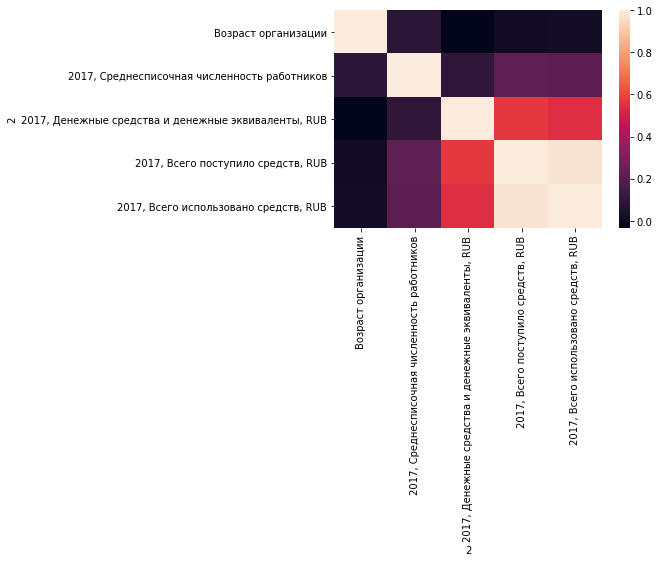

In [71]:
sns.heatmap(temp.corr())

In [72]:
temp_median = round(temp.groupby('2017, Среднесписочная численность работников').median())

temp_median = pd.merge(temp_median, pd.DataFrame(temp['2017, Среднесписочная численность работников'].value_counts()), left_index=True, right_index=True)

temp_median.rename(columns={'2017, Среднесписочная численность работников': 'Количество организаций'}, inplace=True)

temp_median['2017, Среднесписочная численность работников'] = temp_median.index

temp_median

,Возраст организации,"2017, Денежные средства и денежные эквиваленты, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Количество организаций,"2017, Среднесписочная численность работников"
3,5216.0,184500.0,2229500.0,2096000.0,1318,3
8,6024.0,3110000.0,19750000.0,22882000.0,75,8
13,6550.0,2540500.0,23008500.0,23248000.0,108,13
76,5719.0,4795000.0,46365000.0,45500000.0,71,76
126,6242.0,2326000.0,86870500.0,83017000.0,12,126
176,6367.0,3646000.0,71350000.0,71271000.0,5,176
226,6738.0,9663000.0,77367000.0,70487000.0,3,226
276,8712.0,13359500.0,293198500.0,288187500.0,2,276
751,9764.0,19278000.0,326065000.0,325313000.0,1,751


In [73]:
# Создадим словарь temp_median_dict куда запишим числа, соответствующие значениям диапазона: (3): '0 - 5', (8): '6 - 10', 
# (13): '11 - 15', (76): '51 - 100', (126): '101 - 150', (176): '151 - 200', (226): '201 - 250', (276): '251 - 500', 
# (751): '501 - 1000'.
# Создадим словарь:
temp_median_dict = {'2017, Среднесписочная численность работников': {3: '0 - 5', 8: '6 - 10', 13: '11 - 15', 76: '51 - 100', 126: '101 - 150', 176: '151 - 200', 226: '201 - 250', 276: '251 - 500', 751: '501 - 1 000'}}
temp_median = temp_median.replace(temp_median_dict)# Заменили на категориальные значения (диапазоны).
temp_median.index = temp_median['2017, Среднесписочная численность работников']
temp_median.index.name = None

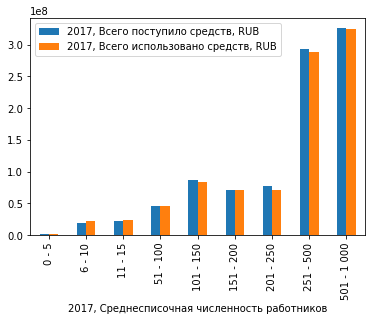

In [74]:
# Построим вертикальный график зависимости между потраченными и поступившими средствами с одной стороны и 
# среднесписочной численностью работников с другой стороны.

temp_median.plot(x="2017, Среднесписочная численность работников", y=['2017, Всего поступило средств, RUB', '2017, Всего использовано средств, RUB'],kind='bar')
plt.show()

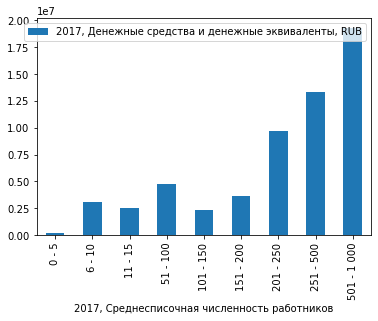

In [75]:
# Построим вертикальный график зависимости между потраченными и поступившими средствами с одной стороны и 
# среднесписочной численностью работников с другой стороны.

temp_median.plot(x="2017, Среднесписочная численность работников", y=['2017, Денежные средства и денежные эквиваленты, RUB'],kind='bar')
plt.show()

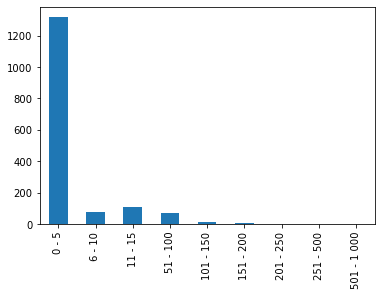

In [76]:
# Построим график зависимости между категорией организации (по количеству работников) и количеством организаций в категории. 
temp_median['Количество организаций'].plot(kind='bar')
plt.show()

## Теперь определим факторы, влияющие на закредитованность и финансовое благополучие организации.

Чтобы собрать максимальную статистику, предлагаю склеить датасеты за отдельные годы в один, присоединяя их последовательно снизу. Да, будут повторы организаций, но это не дубликаты, так как данные в повторяющихся организациях за разные годы.

In [77]:
# Создадим временные копии всех датасетов
russia2017_temp = russia2017.copy()
russia2018_temp = russia2018.copy()
russia2019_temp = russia2019.copy()
russia2020_temp = russia2020.copy()
russia2021_temp = russia2021.copy()

# Перед "приклеиванием" удалим из датасетов за 2017-й и 2018-е годы столбец про среднесписочную численность работников
russia2018_temp = russia2018_temp.drop(columns=['2018, Среднесписочная численность работников'])
russia2017_temp = russia2017_temp.drop(columns=['2017, Среднесписочная численность работников'])

# Перед "приклеиванием" снизу сделаем одинаковыми названия столбцов
russia2018_temp.columns = russia2017_temp.columns
russia2019_temp.columns = russia2017_temp.columns
russia2020_temp.columns = russia2017_temp.columns
russia2021_temp.columns = russia2017_temp.columns

# Теперь склеим датасеты в один.
russia_vertical = russia2017_temp.append(russia2018_temp, ignore_index=True)
russia_vertical = russia_vertical.append(russia2019_temp, ignore_index=True)
russia_vertical = russia_vertical.append(russia2020_temp, ignore_index=True)
russia_vertical = russia_vertical.append(russia2021_temp, ignore_index=True)

russia_vertical

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB",...,"2017, Текущий налог на прибыль, RUB","2017, Чистая прибыль (убыток), RUB","2017, Прибыль от приносящей доход деятельности, RUB","2017, Всего поступило средств, RUB","2017, Расходы на целевые мероприятия, RUB","2017, Расходы на содержание аппарата управления, RUB","2017, Приобретение основных средств, инвентаря и иного имущества, RUB","2017, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB",Отчетный период
0,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2741,Действующая,7714326794,Москва,Благотворительные фонды,NaN,294 000,264 000,NaN,...,NaN,NaN,NaN,24 597 000,25 308 000,644 000,NaN,26 152 000,264 000,2017
1,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,94 000,19 000,133 000,NaN,...,NaN,NaN,NaN,1 533 000,1 242 000,213 000,NaN,1 458 000,132 000,2017
2,"5541 ДОБРО, БФ",2926,Действующая,7743111095,Москва,Благотворительные фонды,82 000,180 424 000,180 424 000,NaN,...,NaN,NaN,NaN,754 602 000,625 374 000,16 211 000,NaN,641 697 000,180 424 000,2017
3,"7 ЖИЗНЕЙ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2729,Действующая,7707332099,Москва,Благотворительные фонды,3 000,NaN,-2 000,3 000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
4,"XXI ВЕК БЕЗ РАКА, БФ",4606,Действующая,7729441165,Москва,Благотворительные фонды,472 000,61 000,74 000,NaN,...,NaN,-20 000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25213,"ЯРКОЕ ДЕТСТВО, БФ ПДС",11415,Действующая,7.10452e+09,Тульская область,Благотворительные фонды,2 000,1 000,NaN,1 000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
25214,"ЯРКОТ, БФ",3605,Действующая,7.6042e+09,Ярославская область,Благотворительные фонды,25 000,127 000,124 000,NaN,...,NaN,NaN,NaN,999 000,674 000,240 000,NaN,952 000,124 000,2021
25215,ЯРОСЛАВСКИЙ ФПРСР,7223,Действующая,7.60604e+09,Ярославская область,Общественные фонды,NaN,122 000,122 000,NaN,...,NaN,NaN,NaN,112 616 000,111 022 000,2 073 000,NaN,113 095 000,122 000,2021
25216,"ЯСШЛ № 9, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1467,Действующая,9.10309e+09,Республика Крым,Благотворительные фонды,NaN,432 000,NaN,NaN,...,NaN,NaN,NaN,689 000,417 000,24 000,NaN,441 000,432 000,2021


In [78]:
russia_vertical['Код налогоплательщика'] = russia_vertical['Код налогоплательщика'].apply(lambda x: str(x))

In [79]:
russia_vertical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25218 entries, 0 to 25217
Data columns (total 34 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Наименование                                                           25218 non-null  object
 1   Возраст организации                                                    25218 non-null  int16 
 2   Статус                                                                 25218 non-null  object
 3   Код налогоплательщика                                                  25218 non-null  object
 4   Регион регистрации                                                     25218 non-null  object
 5   Организационно-правовая форма                                          25218 non-null  object
 6   2017, Дебиторская задолженность, RUB                                   12791 non-null  object


In [80]:
# Удалим из датасета все ненужные столбцы
del russia_vertical['2017, Дебиторская задолженность, RUB']
del russia_vertical['2017, Денежные средства и денежные эквиваленты, RUB']
del russia_vertical['2017, Капитал и резервы, RUB']
del russia_vertical['2017, Заёмные средства (краткосрочные), RUB']
#del russia_vertical['2017, Кредиторская задолженность, RUB']
del russia_vertical['2017, Пассивы всего, RUB']
del russia_vertical['2017, Выручка, RUB']
del russia_vertical['2017, Себестоимость продаж, RUB']
del russia_vertical['2017, Валовая прибыль (убыток), RUB']
del russia_vertical['2017, Коммерческие расходы, RUB']
del russia_vertical['2017, Управленческие расходы, RUB']
del russia_vertical['2017, Прибыль (убыток) от продажи, RUB']
del russia_vertical['2017, Доходы от участия в других организациях, RUB']
del russia_vertical['2017, Проценты к получению, RUB']
del russia_vertical['2017, Проценты к уплате, RUB']
del russia_vertical['2017, Прочие доходы, RUB']
del russia_vertical['2017, Прочие расходы, RUB']
del russia_vertical['2017, Прибыль (убыток) до налогообложения , RUB']
del russia_vertical['2017, Текущий налог на прибыль, RUB']
del russia_vertical['2017, Чистая прибыль (убыток), RUB']
del russia_vertical['2017, Прибыль от приносящей доход деятельности, RUB']
#del russia_vertical['2017, Всего поступило средств, RUB']
del russia_vertical['2017, Расходы на целевые мероприятия, RUB']
del russia_vertical['2017, Расходы на содержание аппарата управления, RUB']
del russia_vertical['2017, Приобретение основных средств, инвентаря и иного имущества, RUB']
#del russia_vertical['2017, Всего использовано средств, RUB']
del russia_vertical['2017, Остаток средств на конец отчетного года, RUB']

russia_vertical

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период
0,"12, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2741,Действующая,7714326794,Москва,Благотворительные фонды,30 000,24 597 000,26 152 000,2017
1,"1ПОМОГАЕТ, БФ",2280,Действующая,9718005523,Москва,Благотворительные фонды,38 000,1 533 000,1 458 000,2017
2,"5541 ДОБРО, БФ",2926,Действующая,7743111095,Москва,Благотворительные фонды,61 000,754 602 000,641 697 000,2017
3,"7 ЖИЗНЕЙ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2729,Действующая,7707332099,Москва,Благотворительные фонды,2 000,NaN,NaN,2017
4,"XXI ВЕК БЕЗ РАКА, БФ",4606,Действующая,7729441165,Москва,Благотворительные фонды,460 000,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...
25213,"ЯРКОЕ ДЕТСТВО, БФ ПДС",11415,Действующая,7104520374.0,Тульская область,Благотворительные фонды,1 000,NaN,NaN,2021
25214,"ЯРКОТ, БФ",3605,Действующая,7604201619.0,Ярославская область,Благотворительные фонды,29 000,999 000,952 000,2021
25215,ЯРОСЛАВСКИЙ ФПРСР,7223,Действующая,7606044464.0,Ярославская область,Общественные фонды,NaN,112 616 000,113 095 000,2021
25216,"ЯСШЛ № 9, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И Р...",1467,Действующая,9103088490.0,Республика Крым,Благотворительные фонды,NaN,689 000,441 000,2021


In [81]:
russia_vertical = russia_vertical.dropna()# Удалили все пропуски. Осталось 8978 строк - достаточно для статистики. 

In [82]:
# Уберем из каждого оставшегося столбца мусор от unicode '\xa0'

russia_vertical['2017, Кредиторская задолженность, RUB'] = russia_vertical['2017, Кредиторская задолженность, RUB'].apply(lambda x: str(x))
russia_vertical['2017, Кредиторская задолженность, RUB'] = russia_vertical['2017, Кредиторская задолженность, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia_vertical['2017, Кредиторская задолженность, RUB'] = russia_vertical['2017, Кредиторская задолженность, RUB'].apply(lambda x: float(x))

russia_vertical['2017, Всего поступило средств, RUB'] = russia_vertical['2017, Всего поступило средств, RUB'].apply(lambda x: str(x))
russia_vertical['2017, Всего поступило средств, RUB'] = russia_vertical['2017, Всего поступило средств, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia_vertical['2017, Всего поступило средств, RUB'] = russia_vertical['2017, Всего поступило средств, RUB'].apply(lambda x: float(x))

russia_vertical['2017, Всего использовано средств, RUB'] = russia_vertical['2017, Всего использовано средств, RUB'].apply(lambda x: str(x))
russia_vertical['2017, Всего использовано средств, RUB'] = russia_vertical['2017, Всего использовано средств, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
russia_vertical['2017, Всего использовано средств, RUB'] = russia_vertical['2017, Всего использовано средств, RUB'].apply(lambda x: float(x))

<ipython-input-82-36f1185c8307>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia_vertical['2017, Кредиторская задолженность, RUB'] = russia_vertical['2017, Кредиторская задолженность, RUB'].apply(lambda x: str(x))
<ipython-input-82-36f1185c8307>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia_vertical['2017, Кредиторская задолженность, RUB'] = russia_vertical['2017, Кредиторская задолженность, RUB'].apply(lambda x: x. replace(u'\xa0', u''))
<ipython-input-82-36f1185c8307>:5: SettingWithCopyWa

In [83]:
russia_vertical.corr()

2,Возраст организации,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB"
2,,,,
Возраст организации,1.000000,0.009869,-0.001641,-0.009961
"2017, Кредиторская задолженность, RUB",0.009869,1.000000,0.099854,0.051793
"2017, Всего поступило средств, RUB",-0.001641,0.099854,1.000000,0.967646
"2017, Всего использовано средств, RUB",-0.009961,0.051793,0.967646,1.000000


In [84]:
russia_vertical[russia_vertical['2017, Кредиторская задолженность, RUB']<0]

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период
238,"ВОЛЬНОЕ ДЕЛО, НФ",7173,Действующая,7701318997,Москва,Фонды,-12000.0,9.431000e+06,3.321900e+07,2017
298,"ДВОРЯНЕ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",2562,Действующая,7751008119,Москва,Благотворительные фонды,-68000.0,7.120000e+05,8.360000e+05,2017
372,"ЖЕМЧУЖИНА, КБФ",2990,Действующая,7736129623,Москва,Благотворительные фонды,-19000.0,1.519000e+06,1.364000e+06,2017
413,"ЗДОРОВЬЕ И ЖИЗНЬ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",3626,Действующая,7719289899,Москва,Благотворительные фонды,-10000.0,2.798900e+07,3.082200e+07,2017
511,"ЛЕМНИСКАТА, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",7725,Действующая,7726309634,Москва,Благотворительные фонды,-1000.0,6.213000e+06,6.401000e+06,2017
1872,"ВЕТЕРАНЫ ПВС, ККОООБФ",6787,Действующая,2310089316,Краснодарский край,Благотворительные фонды,-1000.0,8.870000e+05,9.630000e+05,2017
2585,"ИМЕНИ КАДЫРОВА, РО ФОНД",6521,Действующая,2005504830,Чеченская Республика,Общественные фонды,-51715000.0,7.982700e+08,7.909040e+08,2017
6773,"ВЕТЕРАНЫ ПВС, ККОООБФ",6787,Действующая,2310089316,Краснодарский край,Благотворительные фонды,-1000.0,9.670000e+05,9.250000e+05,2018
7256,"ЕВА, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД МАТЕРИНСТВА",1993,Действующая,5036164964,Московская область,Благотворительные фонды,-3000.0,4.370000e+05,4.300000e+05,2018
11416,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ И РАЗВИТИЯ МО...,6427,Действующая,5410155751,Новосибирская область,Благотворительные фонды,-327000.0,2.762000e+06,2.609000e+06,2019


In [85]:
russia_vertical[russia_vertical['2017, Всего поступило средств, RUB']<0]

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период
1182,"ШЕРИФ, ФОНД",7817,Действующая,7703252170,Москва,Благотворительные фонды,57247000.0,-8799000.0,1959000.0,2017
2347,"ДОСТОЙНЫМ-ЛУЧШЕЕ, НБФ",2807,Действующая,6686996827,Свердловская область,Благотворительные фонды,912000.0,-7206000.0,54948000.0,2017
12735,ФОНД ПОДДЕРЖКИ МОЛОДЫХ УЧЁНЫХ-МЕДИКОВ,4178,Действующая,1655220224,Республика Татарстан,Благотворительные фонды,46000.0,-255000.0,3000.0,2019
17770,"ИНИЦИАТИВА, ОБЩЕСТВЕННЫЙ БЛАГОТВОРИТЕЛЬНЫЙ ФОН...",7266,Действующая,4501099012,Курганская область,Благотворительные фонды,200000.0,-18000.0,-103000.0,2020
23160,ФОНД ПОДДЕРЖКИ МОЛОДЫХ УЧЁНЫХ-МЕДИКОВ,4178,Действующая,1655220224,Республика Татарстан,Благотворительные фонды,2020000.0,-1487000.0,384000.0,2021


In [86]:
russia_vertical[russia_vertical['2017, Всего использовано средств, RUB']<0]

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период
5029,"В ОТВЕТЕ ЗА БУДУЩЕЕ, БФ",3262,Действующая,7707491660,Москва,Благотворительные фонды,15000.0,18419000.0,-19174000.0,2018
9252,"ТОЧКА ОПОРЫ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",4340,Действующая,7842014991.0,Санкт-Петербург,Благотворительные фонды,69000.0,2795000.0,-2888000.0,2018
9254,"ТРАМПЛИН, БФ",1819,Действующая,1657239238.0,Республика Татарстан,Благотворительные фонды,80000.0,753000.0,-627000.0,2018
9649,"АДВОКАТСКАЯ ИНИЦИАТИВА, ФОНД",6867,Действующая,7704502779,Москва,Общественные фонды,5035000.0,41512000.0,-42590000.0,2019
9806,БФ ВОССТАНОВЛЕНИЯ УСАДЬБЫ ХРАБРОВО,4612,Действующая,7714322662,Москва,Благотворительные фонды,55000.0,5766000.0,-7338000.0,2019
...,...,...,...,...,...,...,...,...,...,...
23679,ОМФ МЕСТНОГО РАЗВИТИЯ,5874,Действующая,5032153224.0,Московская область,Общественные фонды,570000.0,111206000.0,-117735000.0,2021
23868,"ПОДДЕРЖКА, БФ",1251,Действующая,5406998438.0,Новосибирская область,Благотворительные фонды,3000.0,330000.0,-458000.0,2021
24338,"САЛГАЛ, РОБФ СПКРТ",1215,Действующая,1701062582.0,Тыва (Республика),Благотворительные фонды,7000.0,106000000.0,-160676000.0,2021
24543,"СОДЕЙСТВИЕ-ХХI ВЕК, ФОНД",4326,Действующая,5903061973.0,Пермский край,Благотворительные фонды,45050000.0,22752000.0,-353865000.0,2021


In [87]:
list_index = russia_vertical[russia_vertical['2017, Всего поступило средств, RUB']<0].index
for i in range (0, len(list_index)):
    russia_vertical['2017, Всего поступило средств, RUB'][list_index[i]] = (-1)*russia_vertical['2017, Всего поступило средств, RUB'][list_index[i]]
    
list_index = russia_vertical[russia_vertical['2017, Кредиторская задолженность, RUB']<0].index
for i in range (0, len(list_index)):
    russia_vertical['2017, Кредиторская задолженность, RUB'][list_index[i]] = (-1)*russia_vertical['2017, Кредиторская задолженность, RUB'][list_index[i]]
    
list_index = russia_vertical[russia_vertical['2017, Всего использовано средств, RUB']<0].index
for i in range (0, len(list_index)):
    russia_vertical['2017, Всего использовано средств, RUB'][list_index[i]] = (-1)*russia_vertical['2017, Всего использовано средств, RUB'][list_index[i]]

<ipython-input-87-7033dcc3b36a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia_vertical['2017, Всего поступило средств, RUB'][list_index[i]] = (-1)*russia_vertical['2017, Всего поступило средств, RUB'][list_index[i]]
C:\Users\vsevo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-87-7033dcc3b36a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Попробуем кластеризировать фонды. Для работы с данными по всем годам предлагаю взять средние значения интересующих нас показателей за все годы. Так же предлагаю отдельно кластеризовать по Кредиторской задолженности и вместе по Всего поступило средств и всего использовано средств.

In [88]:
russia_vertical_mean = russia_vertical.groupby('Код налогоплательщика').mean().drop(columns = ['Возраст организации']).sort_values(by='2017, Всего поступило средств, RUB', ascending=True)
russia_vertical_mean['Код налогоплательщика'] = russia_vertical_mean.index
russia_vertical_mean = russia_vertical_mean.reset_index(drop=True)
russia_vertical_mean

2,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Код налогоплательщика
0,129000.0,1.000000e+03,1.000000e+03,9725032221
1,22000.0,1.000000e+03,1.000000e+03,7843011520.0
2,18000.0,1.000000e+03,1.000000e+03,5261049553.0
3,27.0,1.164000e+03,7.410000e+02,3808119740.0
4,310000.0,2.000000e+03,2.314000e+06,3025031817.0
...,...,...,...,...
2968,395522000.0,3.226219e+09,2.967570e+09,2005504830
2969,50952000.0,3.887212e+09,3.872197e+09,7708123958
2970,1188400.0,3.922824e+09,3.865017e+09,7717093611
2971,606626200.0,4.141753e+09,4.088814e+09,6167111598.0


In [89]:
#Стандартизируем столбцы

list_of_columns = ['2017, Кредиторская задолженность, RUB', '2017, Всего поступило средств, RUB', '2017, Всего использовано средств, RUB']
russia_vertical_mean[list_of_columns] = StandardScaler().fit_transform(russia_vertical_mean[list_of_columns])
russia_vertical_mean

2,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Код налогоплательщика
0,-0.105486,-0.115741,-0.073154,9725032221
1,-0.111372,-0.115741,-0.073154,7843011520.0
2,-0.111592,-0.115741,-0.073154,5261049553.0
3,-0.112581,-0.115741,-0.073155,3808119740.0
4,-0.095528,-0.115739,-0.069962,3025031817.0
...,...,...,...,...
2968,21.646120,7.276801,4.022716,2005504830
2969,2.690421,8.791397,5.271292,7708123958
2970,-0.047205,8.872999,5.261382,7717093611
2971,33.259516,9.374652,5.570269,6167111598.0


In [90]:
# Перенесем в индексы значения столбца 'Код налогоплательщика'
russia_vertical_mean.index = russia_vertical_mean['Код налогоплательщика']
# Переименуем заголовок индексов
russia_vertical_mean.index.name = None
# Удалим лишние столбцы
russia_vertical_mean = russia_vertical_mean.drop(columns = ['2017, Всего поступило средств, RUB', '2017, Всего использовано средств, RUB', 'Код налогоплательщика'])
russia_vertical_mean

2,"2017, Кредиторская задолженность, RUB"
9725032221,-0.105486
7843011520.0,-0.111372
5261049553.0,-0.111592
3808119740.0,-0.112581
3025031817.0,-0.095528
...,...
2005504830,21.646120
7708123958,2.690421
7717093611,-0.047205
6167111598.0,33.259516


In [91]:
# Разобьем на кластеры с заданными параметрами
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(russia_vertical_mean)

KMeans(n_clusters=3, random_state=42)

In [92]:
# Выведем количество фондов в каждом получившемся кластере
a = k_means.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

2938 4 31 

In [93]:
cluster_numbers = pd.DataFrame(pd.Series(k_means.labels_.tolist()).astype(str).str.zfill(1))
cluster_numbers.index = russia_vertical_mean.index
russia_vertical_mean_with_cluster_numbers = russia_vertical_mean.join(cluster_numbers).drop(columns = ['2017, Кредиторская задолженность, RUB'])
russia_vertical_mean_with_cluster_numbers.rename(columns={0: 'Кластер'}, inplace=True)
russia_vertical_mean_with_cluster_numbers

,Кластер
9725032221,0
7843011520.0,0
5261049553.0,0
3808119740.0,0
3025031817.0,0
...,...
2005504830,1
7708123958,2
7717093611,0
6167111598.0,1


In [94]:
russia_vertical_mean_with_cluster_numbers['Код налогоплательщика']=russia_vertical_mean_with_cluster_numbers.index
russia_vertical_mean_with_cluster_numbers.reset_index()
russia_vertical_mean_with_cluster_numbers

,Кластер,Код налогоплательщика
9725032221,0,9725032221
7843011520.0,0,7843011520.0
5261049553.0,0,5261049553.0
3808119740.0,0,3808119740.0
3025031817.0,0,3025031817.0
...,...,...
2005504830,1,2005504830
7708123958,2,7708123958
7717093611,0,7717093611
6167111598.0,1,6167111598.0


In [95]:
# Удалим из датасета russia_vertical_mean_with_cluster_numbers все столбцы кроме
# russia_vertical_mean_with_cluster_numbers['Кластер']

# Добавим в датасет russia_vertical номера кластеров и запишем в датасет russia_vertical_cluster
russia_vertical_cluster = russia_vertical.set_index('Код налогоплательщика').join(russia_vertical_mean_with_cluster_numbers.set_index('Код налогоплательщика'))
russia_vertical_cluster

,Наименование,Возраст организации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период,Кластер
Код налогоплательщика,,,,,,,,,,
0201995162,БФ МР АБЗЕЛИЛОВСКИЙ РАЙОН РБ,3428,Действующая,Башкортостан (Республика),Благотворительные фонды,25000.0,1.131000e+06,1075000.0,2017,0
0201995162,БФ МР АБЗЕЛИЛОВСКИЙ РАЙОН РБ,3428,Действующая,Башкортостан (Республика),Благотворительные фонды,120000.0,1.941000e+06,2340000.0,2020,0
0223995053,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД С. ЗИЛАИР,4067,Действующая,Башкортостан (Республика),Благотворительные фонды,81000.0,1.840000e+05,284000.0,2017,0
0223995053,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД С. ЗИЛАИР,4067,Действующая,Башкортостан (Республика),Благотворительные фонды,121000.0,1.470000e+05,107000.0,2018,0
0223995053,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД С. ЗИЛАИР,4067,Действующая,Башкортостан (Республика),Благотворительные фонды,6000.0,2.260000e+05,341000.0,2019,0
...,...,...,...,...,...,...,...,...,...,...
9729278145,"ЛЬНЯНОЙ СОЮЗ, МОФ",1334,Действующая,Москва,Общественные фонды,333000.0,2.400000e+07,24975000.0,2019,0
9729278145,"ЛЬНЯНОЙ СОЮЗ, МОФ",1334,Действующая,Москва,Общественные фонды,82000.0,1.000100e+07,10362000.0,2020,0
9731011290,"СЕРДЦА НАШИХ ДЕТЕЙ, БФ",1400,Действующая,Москва,Благотворительные фонды,63000.0,8.694000e+06,8955000.0,2019,0


In [96]:
# Сгруппируем данные по кластерам взяв медианное значение
russia_vertical_cluster_grouped = russia_vertical_cluster.groupby('Кластер').mean()
russia_vertical_cluster_grouped

,Возраст организации,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB"
Кластер,,,,
0,4941.422242,9.633826e+05,5.488321e+07,6.016657e+07
1,5018.500000,4.380002e+08,1.931533e+09,1.876862e+09
2,5388.107143,6.499535e+07,7.580640e+08,7.234656e+08


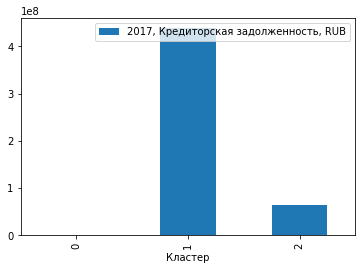

In [97]:

russia_vertical_cluster_grouped.plot(y=['2017, Кредиторская задолженность, RUB'],kind='bar')
plt.show()

In [98]:
russia_vertical_cluster_biggest = russia_vertical_cluster[russia_vertical_cluster['Кластер']=='1']

In [99]:
russia_vertical_cluster_biggest['Наименование'].value_counts().index.tolist()

['КОНСТАНТИНОВСКИЙ ФОНД',
 'ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО',
 'МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД',
 'ИМЕНИ КАДЫРОВА, РО ФОНД']

In [100]:
russia_vertical_cluster_biggest.index = russia_vertical_cluster_biggest['Наименование']
russia_vertical_cluster_biggest.index.name = None
russia_vertical_cluster_biggest

,Наименование,Возраст организации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период,Кластер
"ИМЕНИ КАДЫРОВА, РО ФОНД","ИМЕНИ КАДЫРОВА, РО ФОНД",6521,Действующая,Чеченская Республика,Общественные фонды,51715000.0,7.982700e+08,7.909040e+08,2017,1
"ИМЕНИ КАДЫРОВА, РО ФОНД","ИМЕНИ КАДЫРОВА, РО ФОНД",6521,Действующая,Чеченская Республика,Общественные фонды,511233000.0,2.247224e+09,7.551930e+08,2018,1
"ИМЕНИ КАДЫРОВА, РО ФОНД","ИМЕНИ КАДЫРОВА, РО ФОНД",6521,Действующая,Чеченская Республика,Общественные фонды,623618000.0,6.633163e+09,7.356612e+09,2019,1
"ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО","ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО",3261,Действующая,Ростовская область,Фонды,379947000.0,3.226282e+09,3.029121e+09,2017,1
"ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО","ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО",3261,Действующая,Ростовская область,Фонды,302972000.0,3.482906e+09,3.578104e+09,2018,1
"ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО","ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО",3261,Действующая,Ростовская область,Фонды,598675000.0,4.963535e+09,4.860978e+09,2019,1
"ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО","ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО",3261,Действующая,Ростовская область,Фонды,973357000.0,3.937652e+09,4.691986e+09,2020,1
"ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО","ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО",3261,Действующая,Ростовская область,Фонды,778180000.0,5.098391e+09,4.283879e+09,2021,1
"МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД","МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД",3452,Действующая,Ульяновская область,Фонды,109915000.0,8.367700e+08,7.015810e+08,2017,1
"МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД","МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД",3452,Действующая,Ульяновская область,Фонды,68900000.0,8.304990e+08,7.341770e+08,2018,1


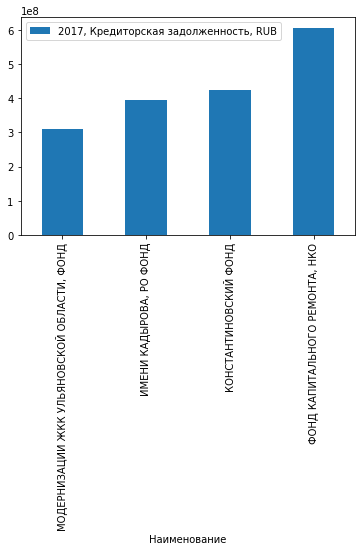

In [101]:
russia_vertical_cluster_biggest.groupby('Наименование').mean().sort_values(by='2017, Кредиторская задолженность, RUB', ascending=True).plot(y=['2017, Кредиторская задолженность, RUB'],kind='bar')
plt.show()

In [102]:
russia_vertical_cluster_big = russia_vertical_cluster[russia_vertical_cluster['Кластер']=='2']

In [103]:
russia_vertical_cluster_big['Наименование'].value_counts().index.tolist()

['ПОДАРИ ЖИЗНЬ, ФОНД',
 'ПОЧЕТ, БФ',
 'НОВЫЙ ДОМ, БФ',
 'РАЗВИТИЯ ГОРОДОВ, ФОНД',
 'ПРАВОСЛАВНОГО ТЕЛЕВИДЕНИЯ, ФОНД',
 'ШЕРИФ, ФОНД',
 'ФОРАС, БФ',
 'ФОНД ВАЛЕРИЯ ГЕРГИЕВА, НО БФ',
 'РЕГИОНАЛЬНАЯ ПЛАТФОРМА, ФОНД',
 'ПАМЯТЬ ПОКОЛЕНИЙ, БФ',
 'СОДЕЙСТВИЕ-ХХI ВЕК, ФОНД',
 'ФПБМ',
 'РОФКР ПО',
 'ПЕРИ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'КИРИЛЕНКО-ДЕТЯМ!, НКО БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ПОДДЕРЖКИ ВЕТЕРАНОВ ТРУДА НАДЕЖДА, НО',
 'НАЦИОНАЛЬНЫЙ СОЦИАЛЬНЫЙ ФОНД, БФ',
 'ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'СВЕТЛЫЙ МИР, БФ',
 'ВОДА ЕВРАЗИИ, ЭФ',
 'САМБО, МОФ РФКС',
 'ММСИ, ФОНД',
 'ОФВРОРКК',
 'ВИДЕОПАСПОРТ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'НОВА, БФ',
 'БЛАГОТВОРИТЕЛЬНЫЙ ФОНД ИМЕНИ СОТНИКА М.Я. ЧАЙКИ',
 'ПРОДВИЖЕНИЕ СОЦИАЛЬНЫХ ПРОЕКТОВ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'САМБЕКСКИЕ ВЫСОТЫ, БФ',
 'ОТЧИЙ ДОМ, БФ',
 'БУДУЩЕЕ ВМЕСТЕ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'СОЦИАЛЬНАЯ ПОМОЩЬ, БФ']

In [104]:
russia_vertical_cluster_big.index = russia_vertical_cluster_big['Наименование']
russia_vertical_cluster_big.index.name = None
russia_vertical_cluster_big

,Наименование,Возраст организации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период,Кластер
"ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",6908,Действующая,Воронежская область,Благотворительные фонды,246620000.0,11174000.0,4.310000e+05,2018,2
"ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",6908,Действующая,Воронежская область,Благотворительные фонды,282592000.0,37320000.0,2.487100e+07,2019,2
"ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",6908,Действующая,Воронежская область,Благотворительные фонды,289229000.0,6424000.0,3.386100e+07,2020,2
"ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",6908,Действующая,Воронежская область,Благотворительные фонды,5000.0,769000.0,1.349521e+09,2021,2
"ФОРАС, БФ","ФОРАС, БФ",9260,Действующая,Новгородская область,Благотворительные фонды,139390000.0,118984000.0,3.862300e+07,2017,2
...,...,...,...,...,...,...,...,...,...,...
"САМБО, МОФ РФКС","САМБО, МОФ РФКС",3960,Действующая,Санкт-Петербург,Общественные фонды,35686000.0,192140000.0,1.193970e+08,2021,2
ОФВРОРКК,ОФВРОРКК,7375,Действующая,Камчатский край,Общественные фонды,36339000.0,28785000.0,2.759800e+07,2019,2
ОФВРОРКК,ОФВРОРКК,7375,Действующая,Камчатский край,Общественные фонды,36937000.0,34166000.0,2.974300e+07,2020,2
"НОВА, БФ","НОВА, БФ",942,Действующая,Москва,Благотворительные фонды,175852000.0,257399000.0,1.637830e+08,2020,2


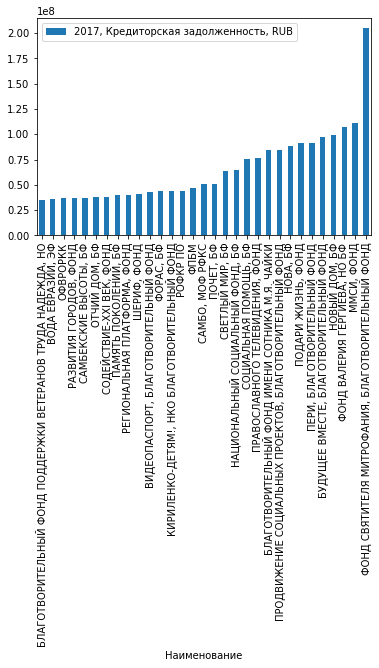

In [105]:
russia_vertical_cluster_big.groupby('Наименование').mean().sort_values(by='2017, Кредиторская задолженность, RUB', ascending=True).plot(y=['2017, Кредиторская задолженность, RUB'],kind='bar')
plt.show()

In [106]:
russia_vertical_mean = russia_vertical.groupby('Код налогоплательщика').mean().drop(columns = ['Возраст организации']).sort_values(by='2017, Всего поступило средств, RUB', ascending=True)
russia_vertical_mean['Код налогоплательщика'] = russia_vertical_mean.index
russia_vertical_mean = russia_vertical_mean.reset_index(drop=True)
russia_vertical_mean

2,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Код налогоплательщика
0,129000.0,1.000000e+03,1.000000e+03,9725032221
1,22000.0,1.000000e+03,1.000000e+03,7843011520.0
2,18000.0,1.000000e+03,1.000000e+03,5261049553.0
3,27.0,1.164000e+03,7.410000e+02,3808119740.0
4,310000.0,2.000000e+03,2.314000e+06,3025031817.0
...,...,...,...,...
2968,395522000.0,3.226219e+09,2.967570e+09,2005504830
2969,50952000.0,3.887212e+09,3.872197e+09,7708123958
2970,1188400.0,3.922824e+09,3.865017e+09,7717093611
2971,606626200.0,4.141753e+09,4.088814e+09,6167111598.0


In [107]:
#Стандартизируем столбцы

list_of_columns = ['2017, Кредиторская задолженность, RUB', '2017, Всего поступило средств, RUB', '2017, Всего использовано средств, RUB']
russia_vertical_mean[list_of_columns] = StandardScaler().fit_transform(russia_vertical_mean[list_of_columns])
russia_vertical_mean

2,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Код налогоплательщика
0,-0.105486,-0.115741,-0.073154,9725032221
1,-0.111372,-0.115741,-0.073154,7843011520.0
2,-0.111592,-0.115741,-0.073154,5261049553.0
3,-0.112581,-0.115741,-0.073155,3808119740.0
4,-0.095528,-0.115739,-0.069962,3025031817.0
...,...,...,...,...
2968,21.646120,7.276801,4.022716,2005504830
2969,2.690421,8.791397,5.271292,7708123958
2970,-0.047205,8.872999,5.261382,7717093611
2971,33.259516,9.374652,5.570269,6167111598.0


In [108]:
# Перенесем в индексы значения столбца 'Код налогоплательщика'
russia_vertical_mean.index = russia_vertical_mean['Код налогоплательщика']
# Переименуем заголовок индексов
russia_vertical_mean.index.name = None
# Удалим лишние столбцы
russia_vertical_mean = russia_vertical_mean.drop(columns = ['2017, Кредиторская задолженность, RUB', 'Код налогоплательщика'])
russia_vertical_mean

2,"2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB"
9725032221,-0.115741,-0.073154
7843011520.0,-0.115741,-0.073154
5261049553.0,-0.115741,-0.073154
3808119740.0,-0.115741,-0.073155
3025031817.0,-0.115739,-0.069962
...,...,...
2005504830,7.276801,4.022716
7708123958,8.791397,5.271292
7717093611,8.872999,5.261382
6167111598.0,9.374652,5.570269


In [109]:
# Разобьем на кластеры с заданными параметрами
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(russia_vertical_mean)

KMeans(n_clusters=3, random_state=42)

In [110]:
# Выведем количество фондов в каждом получившемся кластере
a = k_means.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

2935 1 37 

In [111]:
cluster_numbers = pd.DataFrame(pd.Series(k_means.labels_.tolist()).astype(str).str.zfill(1))
cluster_numbers.index = russia_vertical_mean_with_cluster_numbers.index
russia_vertical_mean_with_cluster_numbers = russia_vertical_mean.join(cluster_numbers)
russia_vertical_mean_with_cluster_numbers.rename(columns={0: 'Кластер'}, inplace=True)
russia_vertical_mean_with_cluster_numbers

,"2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Кластер
9725032221,-0.115741,-0.073154,0
7843011520.0,-0.115741,-0.073154,0
5261049553.0,-0.115741,-0.073154,0
3808119740.0,-0.115741,-0.073155,0
3025031817.0,-0.115739,-0.069962,0
...,...,...,...
2005504830,7.276801,4.022716,2
7708123958,8.791397,5.271292,2
7717093611,8.872999,5.261382,2
6167111598.0,9.374652,5.570269,2


In [112]:
russia_vertical_mean_with_cluster_numbers['Код налогоплательщика']=russia_vertical_mean_with_cluster_numbers.index
russia_vertical_mean_with_cluster_numbers.reset_index()
russia_vertical_mean_with_cluster_numbers

,"2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Кластер,Код налогоплательщика
9725032221,-0.115741,-0.073154,0,9725032221
7843011520.0,-0.115741,-0.073154,0,7843011520.0
5261049553.0,-0.115741,-0.073154,0,5261049553.0
3808119740.0,-0.115741,-0.073155,0,3808119740.0
3025031817.0,-0.115739,-0.069962,0,3025031817.0
...,...,...,...,...
2005504830,7.276801,4.022716,2,2005504830
7708123958,8.791397,5.271292,2,7708123958
7717093611,8.872999,5.261382,2,7717093611
6167111598.0,9.374652,5.570269,2,6167111598.0


In [113]:
# Удалим из датасета russia_vertical_mean_with_cluster_numbers все столбцы кроме
# russia_vertical_mean_with_cluster_numbers['Кластер']
russia_vertical_mean_with_cluster_numbers = russia_vertical_mean_with_cluster_numbers.drop(columns = ['2017, Всего поступило средств, RUB', '2017, Всего использовано средств, RUB'])
# Добавим в датасет russia_vertical номера кластеров и запишем в датасет russia_vertical_cluster
russia_vertical_cluster = russia_vertical.set_index('Код налогоплательщика').join(russia_vertical_mean_with_cluster_numbers.set_index('Код налогоплательщика'))
russia_vertical_cluster

,Наименование,Возраст организации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период,Кластер
Код налогоплательщика,,,,,,,,,,
0201995162,БФ МР АБЗЕЛИЛОВСКИЙ РАЙОН РБ,3428,Действующая,Башкортостан (Республика),Благотворительные фонды,25000.0,1.131000e+06,1075000.0,2017,0
0201995162,БФ МР АБЗЕЛИЛОВСКИЙ РАЙОН РБ,3428,Действующая,Башкортостан (Республика),Благотворительные фонды,120000.0,1.941000e+06,2340000.0,2020,0
0223995053,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД С. ЗИЛАИР,4067,Действующая,Башкортостан (Республика),Благотворительные фонды,81000.0,1.840000e+05,284000.0,2017,0
0223995053,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД С. ЗИЛАИР,4067,Действующая,Башкортостан (Республика),Благотворительные фонды,121000.0,1.470000e+05,107000.0,2018,0
0223995053,БЛАГОТВОРИТЕЛЬНЫЙ ФОНД С. ЗИЛАИР,4067,Действующая,Башкортостан (Республика),Благотворительные фонды,6000.0,2.260000e+05,341000.0,2019,0
...,...,...,...,...,...,...,...,...,...,...
9729278145,"ЛЬНЯНОЙ СОЮЗ, МОФ",1334,Действующая,Москва,Общественные фонды,333000.0,2.400000e+07,24975000.0,2019,0
9729278145,"ЛЬНЯНОЙ СОЮЗ, МОФ",1334,Действующая,Москва,Общественные фонды,82000.0,1.000100e+07,10362000.0,2020,0
9731011290,"СЕРДЦА НАШИХ ДЕТЕЙ, БФ",1400,Действующая,Москва,Благотворительные фонды,63000.0,8.694000e+06,8955000.0,2019,0


In [114]:
# Сгруппируем данные по кластерам взяв медианное значение
russia_vertical_cluster_grouped = russia_vertical_cluster.groupby('Кластер').mean()
russia_vertical_cluster_grouped

,Возраст организации,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB"
Кластер,,,,
0,4942.137395,1.650642e+06,2.941235e+07,2.844057e+07
1,1987.000000,2.507500e+05,2.074749e+10,3.800427e+10
2,5297.237500,5.711079e+07,1.644044e+09,1.527957e+09


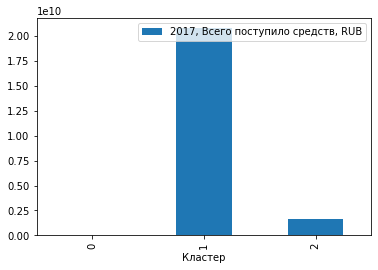

In [115]:

russia_vertical_cluster_grouped.plot(y=['2017, Всего поступило средств, RUB'],kind='bar')
plt.show()

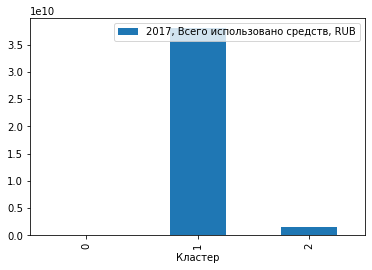

In [116]:
russia_vertical_cluster_grouped.plot(y=['2017, Всего использовано средств, RUB'],kind='bar')
plt.show()

In [117]:
russia_vertical_cluster_biggest = russia_vertical_cluster[russia_vertical_cluster['Кластер']=='1']

In [118]:
russia_vertical_cluster_biggest['Наименование'].value_counts().index.tolist()

['ФОНД ИМЕНИ АЛЕКСАНДРОВА']

In [119]:
russia_vertical_cluster_biggest.index = russia_vertical_cluster_biggest['Наименование']
russia_vertical_cluster_biggest.index.name = None
russia_vertical_cluster_biggest

,Наименование,Возраст организации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период,Кластер
ФОНД ИМЕНИ АЛЕКСАНДРОВА,ФОНД ИМЕНИ АЛЕКСАНДРОВА,1987,Действующая,Москва,Благотворительные фонды,12000.0,7.020000e+10,1.238143e+11,2018,1
ФОНД ИМЕНИ АЛЕКСАНДРОВА,ФОНД ИМЕНИ АЛЕКСАНДРОВА,1987,Действующая,Москва,Благотворительные фонды,450000.0,5.962406e+09,1.319956e+10,2019,1
ФОНД ИМЕНИ АЛЕКСАНДРОВА,ФОНД ИМЕНИ АЛЕКСАНДРОВА,1987,Действующая,Москва,Благотворительные фонды,19000.0,3.224859e+09,1.086320e+10,2020,1
ФОНД ИМЕНИ АЛЕКСАНДРОВА,ФОНД ИМЕНИ АЛЕКСАНДРОВА,1987,Действующая,Москва,Благотворительные фонды,522000.0,3.602685e+09,4.140040e+09,2021,1


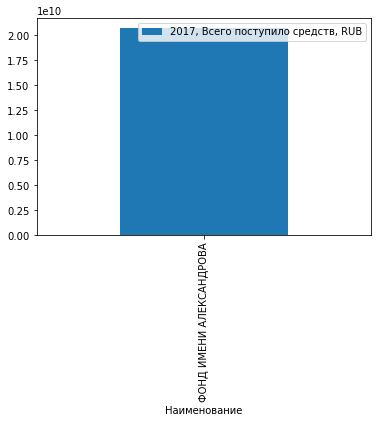

In [120]:
russia_vertical_cluster_biggest.groupby('Наименование').mean().sort_values(by='2017, Всего поступило средств, RUB', ascending=True).plot(y=['2017, Всего поступило средств, RUB'],kind='bar')
plt.show()

In [121]:
russia_vertical_cluster_big = russia_vertical_cluster[russia_vertical_cluster['Кластер']=='2']

In [122]:
russia_vertical_cluster_big['Наименование'].value_counts().index.tolist()

['ПОДАРИ ЖИЗНЬ, ФОНД',
 'ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО',
 'НОВЫЙ ДОМ, БФ',
 'ПРАВОСЛАВНОГО ТЕЛЕВИДЕНИЯ, ФОНД',
 'ГЕОГРАФИЯ ДОБРА, БФ',
 'ЛУКОЙЛ, БФ',
 'САФМАР, БФ',
 'СОДЕЙСТВИЕ-ХХI ВЕК, ФОНД',
 'ПОЧЕТ, БФ',
 'МИРОЗДАНИЕ, БФ',
 'ФОНД ВАЛЕРИЯ ГЕРГИЕВА, НО БФ',
 'РЕГИОНАЛЬНАЯ ПЛАТФОРМА, ФОНД',
 'НФПП',
 'ЦСП, БО ФОНД',
 'ТАТНЕФТЬ, БФ',
 'МЕТАЛЛУРГ, БФ',
 'ДЖОЙНТ, ФОНД',
 'БФПД',
 'ПАМЯТЬ ПОКОЛЕНИЙ, БФ',
 'ФОНД ПРОДОВОЛЬСТВИЯ РУСЬ, БФ',
 'МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД',
 'ВКЛАД В БУДУЩЕЕ',
 'АЛЁША, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'РУСФОНД, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'ИСКУССТВО, НАУКА И СПОРТ, ФОНД',
 'ДЕТСКИЙ МИР, БФ',
 'ПОТАНИНА, ФОНД',
 'МОНОЛИТ, ФОНД',
 'ТИМЧЕНКО, ФОНД',
 'ЗАЩИТА, ФОНД',
 'ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'ИМЕНИ КАДЫРОВА, РО ФОНД',
 'ИМАН, БФ',
 'СОЦИАЛЬНАЯ ОТВЕТСТВЕННОСТЬ, ФОНД',
 'ФОНД СВЯТОЙ ЕКАТЕРИНЫ',
 'ДЕНЬ ПЕРВЫЙ, БФ',
 'ИМ. СВ. ВМЧ. И ЦЕЛИТЕЛЯ ПАНТЕЛЕИМОНА, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД']

In [123]:
russia_vertical_cluster_big.index = russia_vertical_cluster_big['Наименование']
russia_vertical_cluster_big.index.name = None
russia_vertical_cluster_big

,Наименование,Возраст организации,Статус,Регион регистрации,Организационно-правовая форма,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB",Отчетный период,Кластер
"ТАТНЕФТЬ, БФ","ТАТНЕФТЬ, БФ",8357,Действующая,Республика Татарстан,Благотворительные фонды,6882000.0,4.154950e+08,4.272030e+08,2017,2
"ТАТНЕФТЬ, БФ","ТАТНЕФТЬ, БФ",8357,Действующая,Республика Татарстан,Благотворительные фонды,10877000.0,8.212000e+08,8.271260e+08,2018,2
"ТАТНЕФТЬ, БФ","ТАТНЕФТЬ, БФ",8357,Действующая,Республика Татарстан,Благотворительные фонды,19587000.0,1.881662e+09,1.839415e+09,2019,2
"ТАТНЕФТЬ, БФ","ТАТНЕФТЬ, БФ",8357,Действующая,Республика Татарстан,Благотворительные фонды,19805000.0,3.431236e+09,3.074399e+09,2020,2
"ТАТНЕФТЬ, БФ","ТАТНЕФТЬ, БФ",8357,Действующая,Республика Татарстан,Благотворительные фонды,20135000.0,3.632011e+09,3.767851e+09,2021,2
...,...,...,...,...,...,...,...,...,...,...
"ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1420,Действующая,Москва,Благотворительные фонды,47000.0,3.341300e+07,3.324800e+07,2018,2
"ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1420,Действующая,Москва,Благотворительные фонды,52000.0,1.192494e+09,1.191871e+09,2019,2
"ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1420,Действующая,Москва,Благотворительные фонды,20000.0,1.210530e+09,1.077271e+09,2020,2
"ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД","ШКОЛА ЛЕТОВО, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",1420,Действующая,Москва,Благотворительные фонды,3000.0,1.468906e+09,1.541151e+09,2021,2


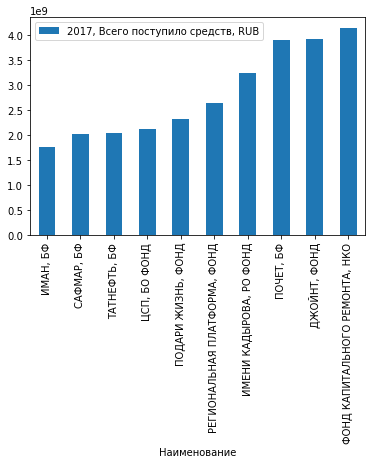

In [124]:
russia_vertical_cluster_big.groupby('Наименование').mean().sort_values(by='2017, Всего поступило средств, RUB', ascending=True)[27:37].plot(y=['2017, Всего поступило средств, RUB'],kind='bar')
plt.show()

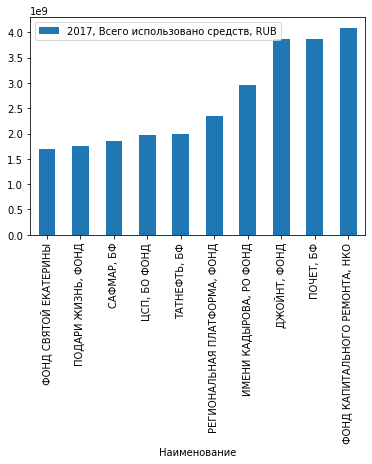

In [125]:
russia_vertical_cluster_big.groupby('Наименование').mean().sort_values(by='2017, Всего использовано средств, RUB', ascending=True)[27:37].plot(y=['2017, Всего использовано средств, RUB'],kind='bar')
plt.show()

In [126]:
len(russia_vertical_cluster_big.groupby('Наименование').mean())

37

In [127]:
russia_vertical_cluster_big.groupby('Наименование').mean().sort_values(by='2017, Всего поступило средств, RUB', ascending=True)[27:37]

,Возраст организации,"2017, Кредиторская задолженность, RUB","2017, Всего поступило средств, RUB","2017, Всего использовано средств, RUB"
Наименование,,,,
"ИМАН, БФ",1712,1758000.0,1.755500e+09,6.773445e+08
"САФМАР, БФ",3235,28000.0,2.023774e+09,1.844724e+09
"ТАТНЕФТЬ, БФ",8357,15457200.0,2.036321e+09,1.987199e+09
"ЦСП, БО ФОНД",6738,9999800.0,2.121125e+09,1.969763e+09
"ПОДАРИ ЖИЗНЬ, ФОНД",5720,90994600.0,2.307894e+09,1.754979e+09
"РЕГИОНАЛЬНАЯ ПЛАТФОРМА, ФОНД",3402,40139400.0,2.633466e+09,2.353403e+09
"ИМЕНИ КАДЫРОВА, РО ФОНД",6521,395522000.0,3.226219e+09,2.967570e+09
"ПОЧЕТ, БФ",8260,50952000.0,3.887212e+09,3.872197e+09
"ДЖОЙНТ, ФОНД",9267,1188400.0,3.922824e+09,3.865017e+09


В число самых закредитованных фондов России входят:
'ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО',
 'КОНСТАНТИНОВСКИЙ ФОНД',
 'МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД',
 'ИМЕНИ КАДЫРОВА, РО ФОНД',
 'ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД',
 'ММСИ, ФОНД',
 'ФОНД ВАЛЕРИЯ ГЕРГИЕВА, НО БФ'.
 
 В число фондов, куда поступает и которые тратят больше всего средств входят:
 'ФОНД ИМЕНИ АЛЕКСАНДРОВА',
 'ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО',
 'ДЖОЙНТ, ФОНД',
 'ПОЧЕТ, БФ'
 'ИМЕНИ КАДЫРОВА, РО ФОНД'
 'РЕГИОНАЛЬНАЯ ПЛАТФОРМА, ФОНД',
 'ПОДАРИ ЖИЗНЬ, ФОНД'.

In [128]:
# Самые финансово благополучные (то есть больше всего получающие и тратящие).
russia[(russia['Наименование']=='ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО')|(russia['Наименование']=='ИМЕНИ КАДЫРОВА, РО ФОНД')|(russia['Наименование']=='ФОНД ИМЕНИ АЛЕКСАНДРОВА')|(russia['Наименование']=='ДЖОЙНТ, ФОНД')|(russia['Наименование']=='ПОЧЕТ, БФ')|(russia['Наименование']=='РЕГИОНАЛЬНАЯ ПЛАТФОРМА, ФОНД')|(russia['Наименование']=='ПОДАРИ ЖИЗНЬ, ФОНД')]

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
1010,"ДЖОЙНТ, ФОНД",9267,Действующая,7717093611,Москва,Благотворительные фонды,11 - 15,NaN,48 056 000,48 102 000,...,2 664 750 000,3 174 294 000,-3 769 393 000,-4 665 371 000,-5 051 277 000,64 466 000,63 055 000,287 217 000,282 319 000,335 920 000
2316,"ПОДАРИ ЖИЗНЬ, ФОНД",5720,Действующая,7714320009,Москва,Благотворительные фонды,11 - 15,51 - 100,130 194 000,31 424 000,...,2 305 712 000,2 023 573 000,1 478 816 000,1 232 768 000,1 734 026 000,881 963 000,932 997 000,1 432 513 000,2 741 785 000,3 864 982 000
2440,"ПОЧЕТ, БФ",8260,Действующая,7708123958,Москва,Благотворительные фонды,51 - 100,51 - 100,106 562 000,118 296 000,...,4 337 361 000,4 161 157 000,3 891 069 000,3 231 803 000,3 739 593 000,133 046 000,159 248 000,118 284 000,281 390 000,240 490 000
2644,"РЕГИОНАЛЬНАЯ ПЛАТФОРМА, ФОНД",3402,Действующая,7707491395,Москва,Общественные фонды,0 - 5,NaN,163 133 000,331 936 000,...,713 230 000,860 634 000,2 105 152 000,1 838 152 000,6 249 846 000,608 148 000,956 182 000,1 428 520 000,2 391 502 000,1 690 957 000
3346,ФОНД ИМЕНИ АЛЕКСАНДРОВА,1987,Действующая,7703423362,Москва,Благотворительные фонды,NaN,NaN,NaN,NaN,...,NaN,123 814 294 000,13 199 563 000,10 863 197 000,4 140 040 000,NaN,16 063 862 000,8 826 705 000,1 188 367 000,NaN
6454,"ИМЕНИ КАДЫРОВА, РО ФОНД",6521,Действующая,2005504830,Чеченская Республика,Общественные фонды,0 - 5,NaN,41 145 000,42 596 000,...,790 904 000,755 193 000,7 356 612 000,NaN,NaN,12 512 000,1 504 543 000,781 122 000,NaN,NaN
10565,"ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО",3261,Действующая,6.16711e+09,Ростовская область,Фонды,51 - 100,51 - 100,81 488 000,52 447 000,...,3 029 121 000,3 578 104 000,4 860 978 000,4 691 986 000,4 283 879 000,2 945 993 000,2 850 795 000,2 953 352 000,2 199 018 000,3 013 530 000


In [129]:
# Самые закредитованные.
russia[(russia['Наименование']=='ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО')|(russia['Наименование']=='КОНСТАНТИНОВСКИЙ ФОНД')|(russia['Наименование']=='МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД')|(russia['Наименование']=='ИМЕНИ КАДЫРОВА, РО ФОНД')|(russia['Наименование']=='ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД')|(russia['Наименование']=='ММСИ, ФОНД')|(russia['Наименование']=='ФОНД ВАЛЕРИЯ ГЕРГИЕВА, НО БФ')]

2,Наименование,Возраст организации,Статус,Код налогоплательщика,Регион регистрации,Организационно-правовая форма,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB",...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
1840,"ММСИ, ФОНД",4318,Действующая,7710478588,Москва,Общественные фонды,NaN,NaN,NaN,NaN,...,NaN,NaN,57 525 000,54 041 000,18 870 000,NaN,NaN,32 749 000,12 749 000,35 113 000
3326,"ФОНД ВАЛЕРИЯ ГЕРГИЕВА, НО БФ",7120,Действующая,7709402778,Москва,Благотворительные фонды,NaN,NaN,1 409 643 000,1 925 635 000,...,349 392 000,753 670 000,621 696 000,3 060 579 000,688 244 000,4 486 830 000,5 177 858 000,5 878 155 000,3 439 137 000,3 953 372 000
6454,"ИМЕНИ КАДЫРОВА, РО ФОНД",6521,Действующая,2005504830,Чеченская Республика,Общественные фонды,0 - 5,NaN,41 145 000,42 596 000,...,790 904 000,755 193 000,7 356 612 000,NaN,NaN,12 512 000,1 504 543 000,781 122 000,NaN,NaN
6719,КОНСТАНТИНОВСКИЙ ФОНД,7441,Действующая,7825445405,Санкт-Петербург,Благотворительные фонды,6 - 10,NaN,9 096 319 000,8 350 897 000,...,91 155 000,98 609 000,125 633 000,47 452 000,44 040 000,268 125 000,184 444 000,77 999 000,89 009 000,50 060 000
7324,"МОДЕРНИЗАЦИИ ЖКК УЛЬЯНОВСКОЙ ОБЛАСТИ, ФОНД",3452,Действующая,7326999197,Ульяновская область,Фонды,11 - 15,NaN,377 271 000,474 220 000,...,701 581 000,734 177 000,1 098 613 000,993 692 000,501 796 000,416 083 000,506 191 000,680 337 000,525 123 000,961 443 000
10565,"ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО",3261,Действующая,6.16711e+09,Ростовская область,Фонды,51 - 100,51 - 100,81 488 000,52 447 000,...,3 029 121 000,3 578 104 000,4 860 978 000,4 691 986 000,4 283 879 000,2 945 993 000,2 850 795 000,2 953 352 000,2 199 018 000,3 013 530 000
10644,"ФОНД СВЯТИТЕЛЯ МИТРОФАНИЯ, БЛАГОТВОРИТЕЛЬНЫЙ ФОНД",6908,Действующая,3.66405e+09,Воронежская область,Благотворительные фонды,0 - 5,NaN,9 014 000,10 984 000,...,NaN,431 000,24 871 000,33 861 000,1 349 521 000,1 361 168 000,1 371 911 000,1 384 360 000,1 356 923 000,8 171 000


Глядя на датасеты с семью самыми финансово благополучными и семью самыми закредитованными фондами, можно сделать такие предварительные выводы:

1) Из семи самых финансово благополучных фондов пять зарегистрировано в Москве, и именно эти пять не входят в семерку самых закредитованных. Входящие же в семерку самых благополучных фондов 'ИМЕНИ КАДЫРОВА, РО ФОНД' и 'ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО', зарегистрированные в Чеченской республике и в Ростовской области соответственно, так же входят в семерку самых закредитованных ('ФОНД КАПИТАЛЬНОГО РЕМОНТА, НКО' самый закредитованный в России, а 'ИМЕНИ КАДЫРОВА, РО ФОНД' на третьем месте). Можно предположить, что финансовое благополучие этих двух фондов базируется на кредитовании, а финансовое благополучие московских фондов ('ДЖОЙНТ, ФОНД', 'ПОДАРИ ЖИЗНЬ, ФОНД', 'ПОЧЕТ, БФ', 'РЕГИОНАЛЬНАЯ ПЛАТФОРМА, ФОНД	', 'ФОНД ИМЕНИ АЛЕКСАНДРОВА	') базируется на иных источниках.
2) Что касается семерки самых закредитованных фондов, то преобладания региона регистрации или какого то другого признака нету.